Gao, P., Han, J., Zhang, R., Lin, Z., Geng, S., Zhou, A., ... & Qiao, Y. (2023). [Llama-adapter v2: Parameter-efficient visual instruction model](https://arxiv.org/abs/2304.15010). arXiv preprint arXiv:2304.15010.

**Abstract**
<!-- How to efficiently transform large language models (LLMs) into instruction followers is recently a popular research direction, while training LLM for multi-modal reasoning remains less explored. Although the recent LLaMA-Adapter demonstrates the potential to handle visual inputs with LLMs, it still cannot generalize well to open-ended visual instructions and lags behind GPT-4. In this paper, we present LLaMA-Adapter V2, a parameter-efficient visual instruction model. Specifically, we first augment LLaMA-Adapter by unlocking more learnable parameters (e.g., norm, bias and scale), which distribute the instructionfollowing ability across the entire LLaMA model besides adapters. Secondly, we propose an early fusion strategy to feed visual tokens only into the early LLM layers, contributing to better visual knowledge incorporation. Thirdly, a joint training paradigm of image-text pairs and instruction-following data is introduced by optimizing disjoint groups of learnable parameters. This strategy effectively alleviates the interference between the two tasks of image-text alignment and instruction following and achieves strong multi-modal reasoning with only a small-scale image-text and instruction dataset. During inference, we incorporate additional expert models (e.g. captioning/OCR systems) into LLaMA-Adapter to further enhance its image understanding capability without incurring training costs. Compared to the original LLaMAAdapter, our LLaMA-Adapter V2 can perform open-ended multi-modal instructions by merely introducing 14M parameters over LLaMA. The newly designed framework also exhibits stronger language-only instruction-following capabilities and even excels in chat interactions. Our code and models are available at https://github.com/ZrrSkywalker/LLaMA-Adapter. -->
如何高效地将大型语言模型(LLM)转化为指令遵循(instruction followers)是近来一个热门的研究方向, 而训练 LLM 进行多模态推理仍未得到充分探索。
尽管最近的 LLaMA-Adapter 展示了使用 LLMs 处理视觉输入的潜力, 但它仍然不能很好地泛化到开放式视觉指令, 并且落后于 GPT-4。
在本文中, 我们提出了一个参数高效的视觉指令模型 LLaMA-Adapter V2。
具体来说, 我们首先通过解锁更多可学习的参数(例如, 范数、偏置和缩放)来增强 LLaMA-Adapter, 这些参数将指令遵循能力分散到整个 LLaMA 模型, 而不仅仅是适配器。
其次, 我们提出了一种早期融合策略, 仅将视觉词元输入到早期的 LLM 层, 从而有助于更好的视觉知识整合。
第三, 通过优化不相交的可学习参数组, 引入图像-文本对和指令遵循数据的联合训练范式。
该策略有效地缓解了图文对齐和指令遵循两个任务之间的干扰, 仅使用小规模图文和指令数据集实现强大的多模态推理。
在推理过程中, 我们将额外的专家模型(例如字幕/OCR系统)集成到LLaMA-Adapter中, 以进一步增强其图像理解能力, 而无需产生训练成本。
与原始LLaMA-Adapter相比, 我们的LLaMA-Adapter V2只需在LLaMA上引入14M个参数即可执行开放式多模态指令。
新设计的框架还表现出更强大的纯语言指令遵循能力, 甚至在聊天交互中表现出色。
我们的代码和模型在 https://github.com/ZrrSkywalker/LLaMA-Adapter 。

# Introduction
<!-- Large Language Models (LLMs) [75] have garnered significant attention in the AI community because of their exceptional ability to comprehend, reason with, and generate human language. To make LLM's responses more vivid and convincing, recent works [7, 19, 50, 62, 68] have explored transforming LLMs into instruction-following models. For example, Stanford Alpaca [62] fine-tunes LLaMA [63] into an instruction-following model using instruction examples generated from OpenAI's Instruct-GPT model [48]. Follow-up works of Alpaca further extend LLaMA by utilizing higher-quality instruction data, such as ShareGPT [1] and those generated by GPT-4 [50]. Compared with the full fine-tuning paradigm adopted by Alpaca and Vicuna [7], LLaMA-Adapter [72] introduces lightweight adapters with zero-initialized attention into the frozen LLaMA for parameter-efficient fine-tuning, along with multi-modality knowledge injection. Despite the significant progress, the aforementioned approaches are still unable to perform more advanced multi-modal instructions, e.g., visual understanding like GPT-4 [47]. -->
大语言模型(LLMs) [75] 因其出色的理解、推理和生成人类语言的能力, 引起人工智能界的极大关注。
为了使 LLM 的响应更加生动和令人信服, 最近的研究 [7、19、50、62、68] 探索将 LLMs 转化为指令遵循模型。
例如, <font color="red">Stanford Alpaca [62] 使用从 OpenAI 的 Instruct-GPT 模型 [48] 生成的指令示例, 微调LLaMA [63]为指令遵循模型</font>。
Alpaca 的后续工作, 通过利用更高质量的指令数据(例如 ShareGPT [1] 和 GPT-4 [50] 生成的数据), 进一步扩展了 LLaMA。
与(Alpaca 和 Vicuna [7] 采用的)完全微调范式相比, LLaMA-Adapter [72] 在冻结的 LLaMA 中引入具有零初始化注意力的轻量级适配器, 以实现参数高效的微调, 以及多模态知识注入。
尽管取得了重大进展, 但上述方法仍然无法执行更高级的多模态指令，例如像 GPT-4 一样的视觉理解[47]。

<!-- Most recently, studies such as MiniGPT-4 [78] and LLaVA [38] have sparked a new wave of research on extending language-only instruction models into multi-modal ones to empower LLMs with visual reasoning ability, in a similar way to LLaMA-Adapter. MiniGPT-4 connects a frozen visual encoder and an LLM by pre-training on 134 million image-text pairs, and then improves the model's performance by further fine-tuning on a well-aligned image-text dataset. LLaVA also leverages image-text pairs to align the visual model and the LLM. Different from MiniGPT-4, LLaVA fine-tunes the whole LLM on 150K high-quality multi-modal instruction data generated by GPT-4. While these methods demonstrate impressive multi-modal understanding capabilities, they require updating billions of model parameters and meticulously collecting a substantial amount of multi-modal training data, which are either annotated by humans or distilled from responses of OpenAI API. -->
最近, MiniGPT-4 [78] 和 LLaVA [38] 等研究引发了新一轮的研究, 将纯语言指令模型扩展为多模态模型, 以类似 LLaMA-Adapter 的方式, 为 LLM 赋予视觉推理能力。
MiniGPT-4 通过在 1.34 亿个图像-文本上进行预训练, 将冻结的视觉编码器和一个 LLM 连接起来, 然后通过在对齐良好的图像-文本数据集上进一步微调, 提高模型的性能。
LLaVA 还利用图像-文本对, 对齐视觉模型和 LLM。
与 MiniGPT-4 不同, LLaVA 在 GPT-4 生成的 150K 个高质量多模态指令数据上微调整个LLM。
虽然这些方法展示了令人印象深刻的多模态理解能力, 但它们需要更新数十亿个模型参数并精心地收集大量多模态训练数据, 这些数据要么由人工标注, 要么从 OpenAI API 的响应中提取。

<!-- In this paper, we aim to design a parameter-efficient visual instruction model. We build on the popular parameter-efficient LLaMA-Adapter to develop our new method, which we refer to as LLaMA-Adapter V2. LLaMA-Adapter was initially developed as an instruction-following model and can be easily transformed into a visual instruction model by incorporating visual features into the adaptation prompts. However, due to the lack of multi-modal instruction tuning data, the multi-modal version of LLaMA-Adapter is restricted as a traditional vision-language model. For instance, LLaMA-Adapter trained on COCO Caption [6] can only produce short image captions when given a specific prompt, such as "Generate caption for this image". The model cannot adapt to open-ended multi-modal instructions, such as complex visual reasoning and visual question answering tasks. -->
在本文中, 我们旨在设计一个参数高效的视觉指令模型。
我们在流行的参数高效的 LLaMA-Adapter 基础上开发了我们的新方法, 我们将其称为 LLaMA-Adapter V2。
LLaMA-Adapter 最初作为指令遵循模型被开发, 通过将视觉特征纳入adaptation提示中, 可轻松转换为视觉指令模型。
然而, 由于缺乏多模态指令调整数据, LLaMA-Adapter 的多模态版本被限制为传统的视觉语言模型。
例如, 在 COCO Caption [6] 上训练的 LLaMA-Adapter 只能在给出特定提示(例如"为此图像生成标题")时生成简短的图像标题。
该模型无法适应开放式多模态指令, 例如复杂的视觉推理和视觉问答任务。

<!-- Although we do not currently leverage multi-modal instruction data, it is still possible to perform multi-modal instruction tuning for LLaMA-Adapter. We begin by using a frozen instruction-following LLaMA-Adapter model as the starting point and refine it by optimizing the visual projection layers on image-text pairs to ensure proper vision-language alignment. However, we have observed that the visual features tend to dominate the adaptation prompts, causing the instruction-following ability to deteriorate rapidly. -->
虽然我们目前没有利用多模态指令数据, 但仍然可以对 LLaMA-Adapter 进行多模态指令调整。
我们使用冻结的指令遵循 LLaMA-Adapter 模型作为起点, 并通过在图像-文本对上优化视觉投影层, 完善该模型, 以确保正确的视觉-语言对齐。
然而, 我们观察到视觉特征往往主导adaptation提示, 导致指令遵循能力迅速下降。


<!-- To address this challenge, we propose a simple ***early fusion of visual knowledge*** strategy that resolves the interference between the two tasks of image-text alignment and language instruction tuning. In LLaMA-Adapter, dynamic visual prompts are incorporated into the static adaptation prompts at the last $L$ layers. However, in LLaMA-Adapter V2, we distribute the dynamic visual prompts to only the first $K$ layers, where $K < N - L$ and $N$ denote the total number of Transformer layers. As a result, image-text alignment no longer disrupts the model's instruction-following capability. With this strategy, we can achieve superior visual instruction learning through the ***joint training with disjoint parameters*** with image captioning data and instruction-following data, even in the absence of highquality multi-modal instruction data. Additionally, we augment LLaMA-Adapter by unlocking more learnable parameters such as normalization, layer bias and scale, which we refer to as ***bias tuning of linear layers***. By increasing the model's tunable capacity, we can spread the instruction-following knowledge across the entire LLM. It is worth noting that these parameters only account for approximately 0.04% of the entire model, ensuring that LLaMA-Adapter V2 remains a parameter-efficient approach. -->
为了应对这一挑战, 我们提出了一种简单的***视觉知识早期融合***策略, 解决图像-文本对齐和语言指令调整两个任务之间的干扰。
在LLaMA-Adapter中, 动态视觉提示被纳入最后$L$层的静态adaptation提示中。
然而, 在LLaMA-Adapter V2中, 我们仅将动态视觉提示分散到前$K$层, 其中$K < N - L$, $N$表示Transformer层的总数。
因此, 图像-文本对齐不再干扰模型的指令遵循能力。
通过这种策略, 即使在缺乏高质量多模态指令数据的情况下, 我们通过使用图像字幕数据和指令遵循数据进行***带不相交参数的联合训练***, 可以实现卓越的视觉指令学习。
此外, 我们通过解锁更多可学习的参数(例如规范化、层偏置和缩放), 增强LLaMA-Adapter，我们称其为***线性层的偏置调整***。
通过增加模型的可调节量, 我们可以将指令遵循知识传播到整个LLM。
值得注意的是, 这些参数仅占整个模型的约0.04%, 以确保 LLaMA-Adapter V2 仍然是一种参数高效的方法。

<!-- Finally, we introduce additional expert models (e.g., captioning, detection, and OCR systems) to enhance the image understanding capabilities of LLaMA-Adapter V2, setting our approach apart from others such as MiniGPT-4 and LLaVA that rely on massive image-text pair training data. By collaborating with these specialized experts, our framework gains increased flexibility and allows plugging in various experts for a wide variety of tasks without the necessity of pre-training on extensive vision-language data. -->
最后, 我们引入额外的专家模型(例如字幕、检测和 OCR 系统)来增强 LLaMA-Adapter V2 的图像理解能力, 使我们的方法有别于其他方法, 这些方法依赖大量图像-文本对训练数据, 例如 MiniGPT-4 和 LLaVA。
通过与这些专业专家合作, 我们的框架获得更大的灵活性, 并允许为各种任务扩展不同的专家, 而无需在大量视觉语言数据上进行预训练。

<!-- Fig. 1 and Fig. 4 illustrate the whole training and generation pipelines of our LLaMA-Adapter V2, respectively. We summarize our main contributions as follows: 
- Stronger Language Instruction Model. With the parameter-efficient tuning strategy and high-quality language instruction data, LLaMA-Adapter V2 surpasses its predecessor LLaMA-Adapter in terms of language instruction-following performance. Moreover, LLaMA-Adapter V2 is capable of conducting multi-turn dialog, demonstrating its stronger ability as a language instruction model.
- Balanced Visual Instruction Tuning. We propose a simple early fusion strategy to solve the interference between image-text alignment and instructionfollowing learning targets. As a result, we transform LLaMA-Adapter V2 into a visual instruction model without the need of multi-modal instruction training data.
- Integration of Expert Systems. Instead of end-to-end pre-training on massive image-text pairs, we embrace modular design where different expert models can be integrated into our framework to enhance the image understanding abilities of LLMs. -->
[图1](#fig.1)和[图4](#fig.4)分别展示了我们的 LLaMA-Adapter V2 的整个训练和生成流水线。
我们总结我们的主要贡献如下:
- **更强大的语言指令模型**。
凭借参数高效的调整策略和高质量的语言指令数据, LLaMA-Adapter V2 在语言指令遵循性能方面超越了其前身 LLaMA-Adapter。
此外, LLaMA-Adapter V2 能够进行多轮对话, 展示了其作为语言指令模型的更强大的能力。
- **平衡的视觉指令调整**。
我们提出了一种简单的早期融合策略, 以解决图像-文本对齐和指令遵循学习目标之间的干扰。
因此, 我们将 LLaMA-Adapter V2 转化为视觉指令模型, 而无需多模态指令训练数据。
- **专家系统的集成**。
我们没有对大量图像-文本对进行端到端的预训练, 而是采用模块化设计, 将不同的专家模型集成到我们的框架中, 以增强 LLMs 的图像理解能力。

<span id='fig.1'></span>
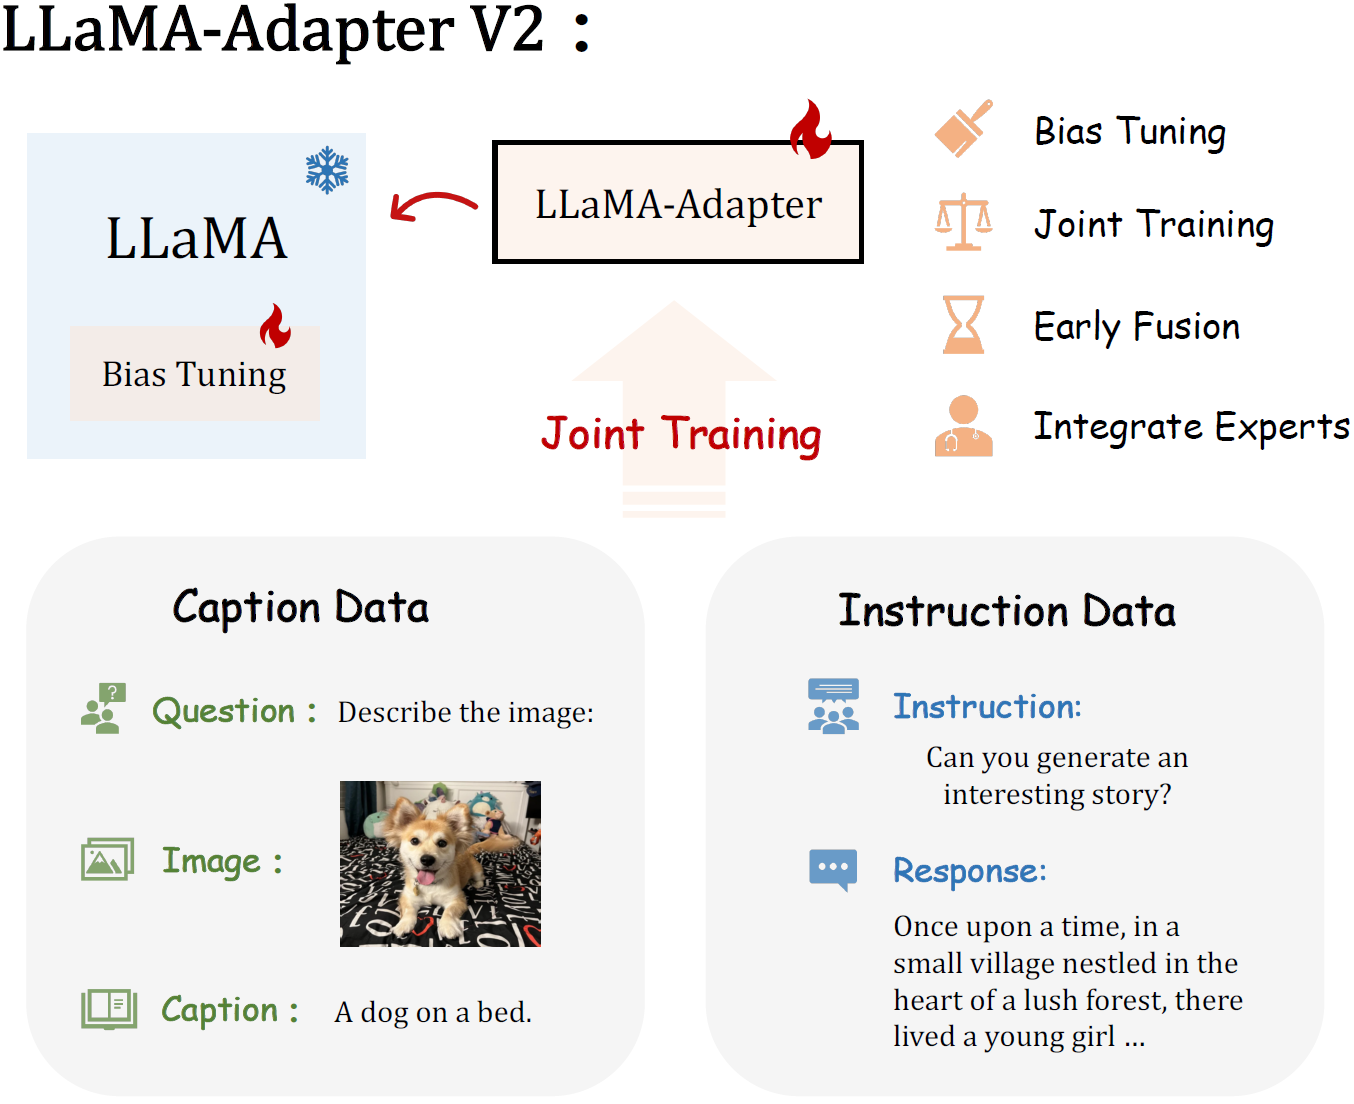
<!-- Figure 1. Training Pipeline of LLaMA-Adapter V2. We introduce several strategies to enhance the capability of LLaMAAdapter [72], which enable a parameter-efficient visual instruction model with superior multi-modal reasoning. -->
图1. LLaMA-Adapter V2 的训练流水线。我们引入几种策略来增强 LLaMA-Adapter [72] 的能力, 从而实现了(具有卓越多模态推理能力的)参数高效的视觉指令模型。

# Related Work
<!-- **Instruction-following Language Models** Large Language Models (LLMs) are pre-trained on extensive text corpora using autoregressive Transformer models to predict subsequent tokens. They have demonstrated strong capabilities as self-supervised [53], multi-task [54], and few-shot learners [4]. Recently, InstructGPT [48] and FLAN [8, 66] have shown that LLMs can be converted into instruction-following models by fine-tuning them on instructional datasets. To facilitate the generation of instruction-following examples, Self-Instruct [65] employs a semi-automated, iterative bootstrapping algorithm that expands a limited seed set of manually-written instructions and progressively expanding the collection of tasks using off-the-shelf LLMs. Alpaca [62] applies the Self-Instruct strategy to produce 52K high-quality instruction-following demonstrations and fine-tunes upon the open-source LLaMA [63] model, ultimately obtaining an instruction-following language model exhibiting many behaviors similar to OpenAI's text-davinci-003. Inspired by Alpaca's success, Vicuna [7] and GPT-4-LLM [50] further reveal that dialog and enhanced instruction-following capabilities can be ignited by fine-tuning on either user-shared ChatGPT conversations or instruction-following data generated by the GPT-4 API. However, Alpaca, Vicuna and GPT-4-LLM all fine-tune the full parameters of LLMs, resulting in unaffordable GPU memory usage and training costs. In contrast, LoRA [26] and LLaMA-Adapter [72] validate that parameter-efficient fine-tuning approaches can potentially replace full parameter updates during supervised finetuning of LLMs. In this paper, LLaMA-Adapter V2 goes a step further by constructing a parameter-efficient zeroshot visual instruction model that reuses the instruction-following ability of LLaMA-Adapter. -->
**指令遵循语言模型** 大型语言模型(LLMs)在大量文本语料库上进行预训练, 使用自回归 Transformer 模型预测后续词元。
它们已展示出强大的自监督 [53]、多任务 [54] 和小样本学习器 [4] 能力。
最近, InstructGPT [48] 和 FLAN [8, 66] 表明, 通过在指令数据集上对 LLMs 进行微调, 可以将 LLMs 转化为指令遵循模型。
为了便于指令遵循示例的生成, Self-Instruct [65] 采用了半自动化、迭代引导算法, 该算法扩展了人工编写指令的有限种子集, 并使用现成的 LLMs 逐步扩展任务集合。
Alpaca [62] 应用 Self-Instruct 策略生成了 52K 高质量指令遵循演示, 并在开源 LLaMA [63] 模型上进行微调, 最终得到一个指令遵循语言模型, 该模型表现出许多(与 OpenAI 的 text-davinci-003 类似的)行为。
受 Alpaca 的成功启发, Vicuna [7] 和 GPT-4-LLM [50] 进一步揭示, (在用户共享的 ChatGPT 会话或 GPT-4 API 生成的指令遵循数据上的)微调可以激发对话和增强的指令遵循能力。
然而, <font color="red">Alpaca、Vicuna 和 GPT-4-LLM 都对 LLMs 的全部参数进行微调</font>, 导致难以承受的 GPU 内存使用量和训练成本。
相比之下, LoRA [26] 和 LLaMA-Adapter [72] 证实参数高效的微调方法在 LLMs 监督微调期间, 可以潜在地取代全参数更新。
在本文中, LLaMA-Adapter V2 更进一步, 构建了一个参数高效的零样本视觉指令模型, 该模型复用了 LLaMA-Adapter 的指令遵循能力。

<!-- **Visual Instruction Models** Traditional image captioning [3, 9, 23, 32, 40, 64] and visual question answering (VQA) [2, 16, 20, 29, 34, 39, 41, 45, 77] approaches can be viewed as simplified versions of visual instruction models. However, their image understanding capabilities fall short compared to GPT-4. To be specific, image captioning models can only describe images using concise, short sentences, while VQA systems are capable of answering various visual-related questions but without providing explicit explanations. Therefore, these systems have yet to achieve the level of proficiency required to meet the demands of real-world applications. Recently, GPT-4 has showcased remarkable visual instruction-following abilities by handling mixed inputs of images and text for diverse tasks, ranging from meme explanation, document-level reasoning, exam problem-solving, and so on. In pursuit of developing visual instruction-following abilities akin to GPT-4, both LLaVA [38] and MiniGPT-4 [78] assemble highquality multi-modal instruction-following data using Chat-GPT or GPT-4. They then integrate visual encoders and LLMs via a projection layer and fine-tune the models on the curated data. Diverging from these approaches, LLaMA-Adapter V2 strives to build a parameter-efficient visual instruction model without relying on multi-modal instruction data. Rather, LLaMA-Adapter V2 can function effectively using just language instruction data and image-text pairs. -->
**视觉教学模型**
传统的图像字幕[3、9、23、32、40、64]和视觉问答(VQA)[2、16、20、29、34、39、41、45、77]方法可以被视为视觉指令模型的简化版本。
然而, 与GPT-4相比, 它们的图像理解能力不足。
具体而言, <font color="red">图像字幕模型只能用简短的句子描述图像, 而VQA系统能够回答各种与视觉相关的问题, 但不提供明确的解释</font>。
因此, 这些系统尚未达到(满足现实世界应用所需的)熟练程度。
最近, GPT-4通过处理图像和文本的混合输入, 展示出卓越的视觉指令遵循能力, 可用于各种任务, 包括meme解释、文档级推理、考试问题求解等。
为了追求类似于 GPT-4 的视觉指令遵循能力, <font color="red">LLaVA [38] 和 MiniGPT-4 [78] 都使用 Chat-GPT 或 GPT-4 收集高质量的多模态指令遵循数据。然后, 他们通过一个投影层, 集成视觉编码器和 LLMs, 并在精选数据上微调模型</font>。
与这些方法不同, <font color="red">LLaMA-Adapter V2 致力于构建一个参数高效的视觉指令模型, 而不依赖于多模态指令数据</font>。
相反, LLaMA-Adapter V2 仅使用语言指令数据和图像-文本对即可有效地运行。

<!-- **Parameter-efficient Fine-tuning** The pre-training-finetuning paradigm has been proven highly effective in various tasks such as visual recognition, language understanding, text generation, and image synthesis from textual descriptions. However, as model sizes continue to increase exponentially, fine-tuning every parameter in a colossal model becomes increasingly impractical. In contrast, parameter-efficient fine-tuning (PEFT) approaches [12,49] freeze most of the parameters of foundation models and only optimize a small portion of them. Many successful PEFT approaches [10, 17, 22, 28, 31, 59, 60, 71, 73] have been proposed for adopting popular pre-trained models such as BERT [11], GPT [4, 53, 54], ViT [13], CLIP [52], and Stable Diffusion [55] to various downstream tasks. In general, these PEFT approaches can be divided into three categories, namely prefix tuning (e.g. [35,76]), reparameterization (e.g. [10,26,43]), and adapters (e.g. [15,24,74]). In this paper, we present LLaMA-Adapter V2, an elegant and efficient marriage of prefix-tuning and adapter techniques. By utilizing an early fusion strategy and bias tuning, LLaMA-Adapter V2 injects visual features into large language models, yielding impressive multi-modal instruction-following performance with only 0.04% parameters of the entire LLaMA. -->
**参数高效微调**
预训练-微调范式已被证明在各种任务中非常有效, 例如视觉识别、语言理解、文本生成和从文本描述进行图像合成。
然而, 随着模型大小继续呈指数级增长, 微调一个庞大模型中的每个参数变得越来越不切实际。
相比之下, <font color="red">参数高效微调 (PEFT) 方法 [12,49] 冻结基础模型的大部分参数, 只优化其中的一小部分。
许多成功的 PEFT 方法 [10, 17, 22, 28, 31, 59, 60, 71, 73] 已被提出, 用于将流行的预训练模型(如 BERT [11]、GPT [4, 53, 54]、ViT [13]、CLIP [52] 和Stable Diffusion [55])应用于各种下游任务。
总体而言，这些 PEFT 方法可分为三类, 即前缀调整(例如 [35, 76])、重新参数化(例如 [10, 26, 43])和适配器(例如 [15, 24, 74])</font>。
在本文中, 我们提出了 <font color="red">LLaMA-Adapter V2，它是前缀调整和适配器技术的优雅而高效的结合</font>。
通过利用早期融合策略和偏置调整, LLaMA-Adapter V2 将视觉特征注入大型语言模型, 仅使用整个 LLaMA 的 0.04% 参数, 产生令人印象深刻的多模态指令遵循性能。

<!-- **Integration of Expert Systems** Collaboration among multiple expert models has proven to be a successful practice in the field of AI, as it often leads to improved performance and robustness. This is especially true in the realm of computer vision tasks, where ensembles of multiple models consistently achieve top positions on the challenge leaderboards. In recent years, with the continual expansion of LLMs' capabilities, there has been a growing trend [14, 18, 21, 27, 37, 42, 51, 58, 61, 67, 69, 79] to combine them with visual foundation models and leverage their combined strengths to tackle more complex vision-language tasks. By utilizing LLMs as a core controller for external visual models, these experts in turn support LLMs to perform a wider range of tasks that demand a deeper visual understanding. For example, recent studies such as HuggingGPT [58], Visual ChatGPT [67], Chameleon [42], MMReACT [69], and ViperGPT [61] utilize LLMs as the central manager to perform compositional task planning and call upon off-the-shelf expert models/tools to aid in various complex multi-modal tasks, including understanding, generation, search, reasoning, and programming, etc. In addition, PaLM-E [14], Inner Monologue [27], and Text2Motion [37] further extend the capabilities of LLMs to robotics by incorporating real-world sensor modalities. These embodied LLMs possess the power to comprehend natural language instructions and execute sequential manipulation planning in the real world. As a result, the aforementioned approaches facilitate the seamless integration of different expert systems and boost the overall performance and capabilities of LLMs. LLaMA-Adapter V2 stands out by integrating short, yet precise descriptions generated by LLaMA-Adapter during inference time for efficient zeroshot and training-free visual instruction understanding, setting it apart from other methods that require extensive multimodal data during training. In the future, more expert visual systems will be integrated into LLaMA-Adapter V2 for building stronger visual instruction models. -->
**专家系统集成** 多个专家模型之间的协作已被证明是人工智能领域的一种成功实践, 因为它通常会提高性能和稳定性。
在计算机视觉任务领域尤其如此, 多个模型的集合在挑战排行榜上始终名列前茅。
近年来, 随着 LLMs 能力的不断扩展, 将它们与视觉基础模型结合, 并利用它们的组合力量来解决更复杂的视觉语言任务的趋势日益增长 [14、18、21、27、37、42、51、58、61、67、69、79]。
通过使用 LLMs 作为外部视觉模型的核心控制器, 这些专家系统反过来支持 LLMs 执行(需要更深入的视觉理解的)更广泛的任务。
例如, 最近的研究, 如 HuggingGPT [58]、Visual ChatGPT [67]、Chameleon [42]、MMReACT [69] 和 ViperGPT [61], 利用 LLMs 作为中央管理器, 执行组合任务规划, 并调用现成的专家模型/工具来帮助完成各种复杂的多模态任务, 包括理解、生成、搜索、推理和编程等。
此外, PaLM-E [14]、Inner Monologue [27] 和 Text2Motion [37] 通过耦合现实世界的传感器模态, 进一步将 LLMs 的功能扩展到机器人领域。
这些具身 LLMs 具有理解自然语言指令, 并在现实世界中执行顺序操作规划的能力。
因此, 上述方法促进了不同专家系统的无缝集成, 并提高了 LLMs 的整体性能和能力。
LLaMA-Adapter V2 的突出之处在于, 它集成 LLaMA-Adapter 在推理期间生成的简短但精确的描述, 用于高效的零样本和免训练的视觉指令理解, 这使其区别于其他方法, 这些方法在训练期间需要大量多模态数据。
未来, 更多专家视觉系统将集成到 LLaMA-Adapter V2 中, 以构建更强大的视觉指令模型。

# A Revisit of LLaMA-Adapter
<!-- **Zero-initialized Attention**. As a parameter-efficient finetuning solution for adapting LLaMA to acquire instruction-following capability, LLaMA-Adapter [72] freezes the entire LLaMA model [63] and introduces only an extra lightweight adapter module with 1.2M parameters. The adapter layers are employed at the higher Transformer layers of LLaMA and concatenate a set of learnable soft prompts as the prefix to the word tokens. To incorporate newly adapted knowledge into the frozen LLaMA, LLaMA-Adapter proposes a zero-initialized attention mechanism, which enables adaptively controlling the contribution of adaptation prompts to the word tokens by learning a gating factor initialized by zero. The gating magnitude progressively increases during training, thereby gradually injecting the instruction-following ability into the frozen LLaMA. This strategy not only preserves LLaMA's language generation ability during the early training stages but also continuously incorporates new knowledge to enable a powerful instruction follower. -->
**零初始化注意力机制**。
作为一种参数高效的微调解决方案, 用于调整 LLaMA 以获得指令遵循能力, LLaMA-Adapter [72] 冻结了整个 LLaMA 模型 [63], 只引入了一个(具有1.2M个参数的)额外轻量级适配器模块。
适配器层用在 LLaMA 的较高 Transformer 层, 并将一组可学习的软提示连接起来作为单词词元的前缀。
为了将新适配的知识集成到冻结的 LLaMA, LLaMA-Adapter 提出了一种零初始化注意力机制, 该机制通过学习一个初始化为零的门控因子, 可以自适应地控制adaptation提示对单词词元的贡献。
门控幅度在训练过程中逐渐增加, 从而逐渐将指令遵循能力注入到冻结的 LLaMA。
这种策略不仅在训练初期保留了 LLaMA 的语言生成能力, 而且不断融入新知识, 使其成为强大的指令遵循器。

<!-- **Simple Multi-modal Variant**. Besides fine-tuning using language-only instructions, LLaMA-Adapter can also incorporate image and video inputs for multi-modal reasoning. For instance, when dealing with images, LLaMA-Adapter employs a pre-trained visual encoder such as CLIP [52] to extract multi-scale visual features. These features are then aggregated into a global feature and passed through a learnable projection layer to align the visual semantics with linguistic embedding space. Afterward, the global visual feature is added element-wisely to every adaptation prompt at the higher layers of the Transformer. This allows LLaMA-Adapter to generate responses based on both textual and visual inputs, resulting in competitive performance on the ScienceQA benchmark [41]. -->
**简单的多模态变体**。
除了使用纯语言指令进行微调外, LLaMA-Adapter 还可以结合图像和视频输入进行多模态推理。
例如, <font color="red">在处理图像时, LLaMA-Adapter 采用预训练的视觉编码器(如 CLIP [52]), 提取多尺度视觉特征。
然后将这些特征聚合为一个全局特征, 并通过可学习的投影层, 将视觉语义与语言嵌入空间对齐。
之后, 全局视觉特征逐元素地添加到 Transformer 更高层的每个adaptation提示中</font>。
这使得 LLaMA-Adapter 能够基于文本和视觉输入生成响应, 从而在 ScienceQA 基准 [41] 上获得具有竞争力的性能。

<!-- **Open-ended Multi-modal Reasoning**. While LLaMA-Adapter is capable of handling relatively simple tasks such as ScienceQA, it is still unclear whether it can generate open-ended responses, such as those required for general-purpose visual question answering. To investigate this, we first start with a LLaMA-Adapter pre-trained on language instruction data for leveraging its existing instruction-following capabilities. We then conduct experiments by fine-tuning its adapter modules and visual projection layers on the COCO Caption [6] dataset. However, we found that the newly learned visual cues tend to dominate the adaptation prompts, overriding the inherent instruction-following characteristics. Therefore, we propose LLaMAAdapter V2, a parameter-efficient visual instruction model, to fully unleash the multi-modal potential of LLaMA. -->
**开放式多模态推理**。
虽然 LLaMA-Adapter 能够处理相对简单的任务(例如 ScienceQA), 但它能否生成开放式响应(例如通用视觉问答所需的响应)仍未清楚。
为了研究这一点, 我们从在语言指令数据上预训练的 LLaMA-Adapter 开始, 以利用其现有的指令遵循能力。
然后, 我们在 COCO Caption [6] 数据集上, 通过微调其适配器模块和视觉投影层, 进行实验。
然而, 我们发现新学到的视觉提示往往主导adaptation提示, 覆盖了固有的指令遵循特性。
因此, 我们提出了 LLaMA-Adapter V2, 这是一种参数高效的视觉指令模型, 以充分发挥 LLaMA 的多模态潜力。

# LLaMA-Adapter V2
<!-- In this section, we present the technical details of LLaMA-Adapter V2, including *bias tuning of linear layers* (Sec. 4.1) to enhance its language instruction-following ability, *joint training with disjoint parameters* (Sec. 4.2) for balanced visual instruction tuning, *early fusion of visual knowledge* (Sec. 4.3) to balance textual and visual understanding, and *integration with experts* (Sec. 4.4) to boost zero-shot multi-modal reasoning. -->
在本节中, 我们介绍 LLaMA-Adapter V2 的技术细节, 包括*线性层的偏置调整*(第[4.1](#Bias-Tuning-of-Linear-Layers)节)以增强其语言指令遵循能力, *带不相交参数的联合训练*(第[4.2](#Joint-Training-with-Disjoint-Parameters)节)以平衡视觉指令调整, *视觉知识的早期融合*(第[4.3](#Early-Fusion-of-Visual-Knowledge)节)以平衡文本和视觉理解, 以及*专家系统集成*(第[4.4](#Integration-with-Experts)节)以促进零样本多模态推理。

## Bias Tuning of Linear Layers
<!-- LLaMA-Adapter employs learnable adaptation prompts with the zero-initialized attention mechanism (Sec. 3) on the frozen LLaMA model, which allows for efficient incorporation of new knowledge. However, the parameter updates are limited to the adaptation prompts and the gating factor, without modifying the internal parameters of LLMs, which restricts its ability to perform deep fine-tuning. In light of this, we propose a bias tuning strategy to further fuse instruction cues into LLaMA besides the adaptation prompts and the gating factor. Specifically, to adaptively handle the tasks of instruction-following data, we first unfreeze all the normalization layers in LLaMA. For each linear layer in the Transformer, we add a bias and a scale factor as two learnable parameters. We denote the input and pre-trained weights of a certain linear layer as x and W, respectively. In LLaMA-Adapter V2, we modify the linear layer using the bias b and scale s as -->
LLaMA-Adapter 在冻结的 LLaMA 模型上采用可学习的adaptation提示和零初始化注意力机制(第[3](#A-Revisit-of-LLaMA-Adapter)节), 从而允许新知识的有效整合。
然而, 参数更新仅限于adaptation提示和门控因子, 而不修改 LLMs 的内部参数, 这限制了其执行深度微调的能力。
鉴于此, 我们提出了一种偏置调整策略, 除了adaptation提示和门控因子之外, 还将指令提示进一步融合到 LLaMA 中。
具体而言, 为了自适应地处理指令遵循数据的任务, 我们首先解冻 LLaMA 中的所有规范化层。
对于 Transformer 中的每个线性层, 我们添加一个偏置和一个缩放因子, 作为两个可学习的参数。
我们将某个线性层的输入和预训练权重分别表示为$x$和$W$。
在 LLaMA-Adapter V2 中, 我们使用偏置$b$和缩放$s$修改线性层, 如下所示
$$ \begin{align}
y = W \cdot x \to y = s \cdot (W \cdot x + b),& \tag{1} \\
\text{where } b = \text{Init}(0), s = \text{Init}(1).& \tag{2} \\
\end{align} $$
<!-- Similar to zero-initialized attention, we initialize the bias and scale factors with zeros and ones, respectively, to stabilize the training process at early stages. With the incorporation of the bias tuning strategy and high-quality instruction data [50], LLaMA-Adapter V2 acquires superior instruction-following capabilities. Notably, the number of newly added parameters only accounts for 0.04% ($\sim$5M) of the entire LLaMA, showing that LLaMA-Adapter V2 is still a highly parameter-efficient approach. -->
与零初始化注意力机制类似, 我们分别用零和壹初始化偏置和缩放因子, 在早期阶段稳定训练过程。
通过融合偏置调整策略和高质量指令数据 [50], LLaMA-Adapter V2 获得卓越的指令遵循能力。
值得注意的是, 新增参数的数量仅占整个 LLaMA 的 0.04%(约5M), 表明 LLaMA-Adapter V2 仍是一种参数效率极高的方法。

<!-- **Discussion**. Our bias tuning strategy bears similarity to prior parameter-efficient methodologies such as BitFit [70] for BERT fine-tuning and SSF [36] for visual prompt tuning [28]. However, both BitFit and SSF are designed for comprehension tasks with an 80-million parameter scale, whereas our bias tuning demonstrates its efficiency on large language models ranging from 7 billion to 65 billion parameters, such as LLaMA and GPT-3. Moreover, our bias tuning strategy is input-agnostic, unlike Low-Rank Adaptation (LoRA) that adds an input-aware bias using low-rank transformation, further reducing the fine-tuning cost. -->
**讨论**。我们的偏置调整策略类似于先前的参数高效方法, 例如用于 BERT 微调的 BitFit [70] 和用于视觉提示调整 [28] 的 SSF [36]。
然而, BitFit 和 SSF 都是为具有 8000 万参数规模的理解任务而设计的, 而我们的偏置调整证明了其在具有 70 亿到 650 亿个参数的大型语言模型(例如 LLaMA 和 GPT-3)上的有效性。
此外, 我们的偏置调整策略是input-agnostic, 不像低秩自适应 (LoRA), 它使用低秩变换, 添加input-aware偏置，从而进一步降低了微调成本。

## Joint Training with Disjoint Parameters
<!-- Our goal is to simultaneously endow LLaMA-Adapter V2 with the capabilities of generating long language responses and multi-modal understanding. As shown in Fig. 2, we propose a joint training paradigm for LLaMA-Adapter V2 to leverage both image-text captioning data and language-only instruction examples. Due to the data volume difference between 500K image-text pairs and 50K instruction data, naively combining them for optimization can severely harm LLaMA-Adapter’s instruction-following ability, just as discussed in Sec. 3. Therefore, our joint training strategy optimizes disjoint groups of parameters in LLaMA-Adapter V2 for image-text alignment and instruction-following respectively. Specifically, only the visual projection layers and early zero-initialized attention with gating are trained for image-text captioning data, while the late adaptation prompts together with zero gating, the unfrozen norm, newly added bias and scale factors (or optional low-rank adaption [25]) are utilized for learning from the instruction-following data. Such disjoint parameter optimization naturally solves the interference issue between image-text understanding and instruction following, which contributes to the emergent visual instruction-following ability of LLaMA-Adapter V2. -->
我们的目标是同时赋予 LLaMA-Adapter V2 生成长语言响应和多模态理解的能力。
如[图2](#fig.2)所示, 我们为 LLaMA-Adapter V2 提出了一种联合训练范式, 以利用图像-文本字幕数据和纯语言指令示例。
由于 500K 图像-文本对和 50K 指令数据之间的数据量差异, 天真地将它们组合起来用于优化, 可能会严重损害 LLaMA-Adapter 的指令遵循能力, 正如第[3](#A-Revisit-of-LLaMA-Adapter)节所讨论的那样。
因此, 我们的联合训练策略分别优化 LLaMA-Adapter V2 中(用于图像-文本对齐和指令遵循的)不相交参数组。
具体而言, 对于图文字幕数据, 只训练了视觉投影层和带门控的早期零初始化注意力, 而后期adaptation提示与零门控、解冻规范、新增的偏置和缩放因子(或可选的低秩自适应 [25])一起用于从指令遵循数据中学习。
这种不相交的参数优化自然解决了图文理解和指令遵循之间的干扰问题, 这有助于 LLaMA-Adapter V2 的新兴视觉指令遵循能力。

<span id='fig.2'></span>
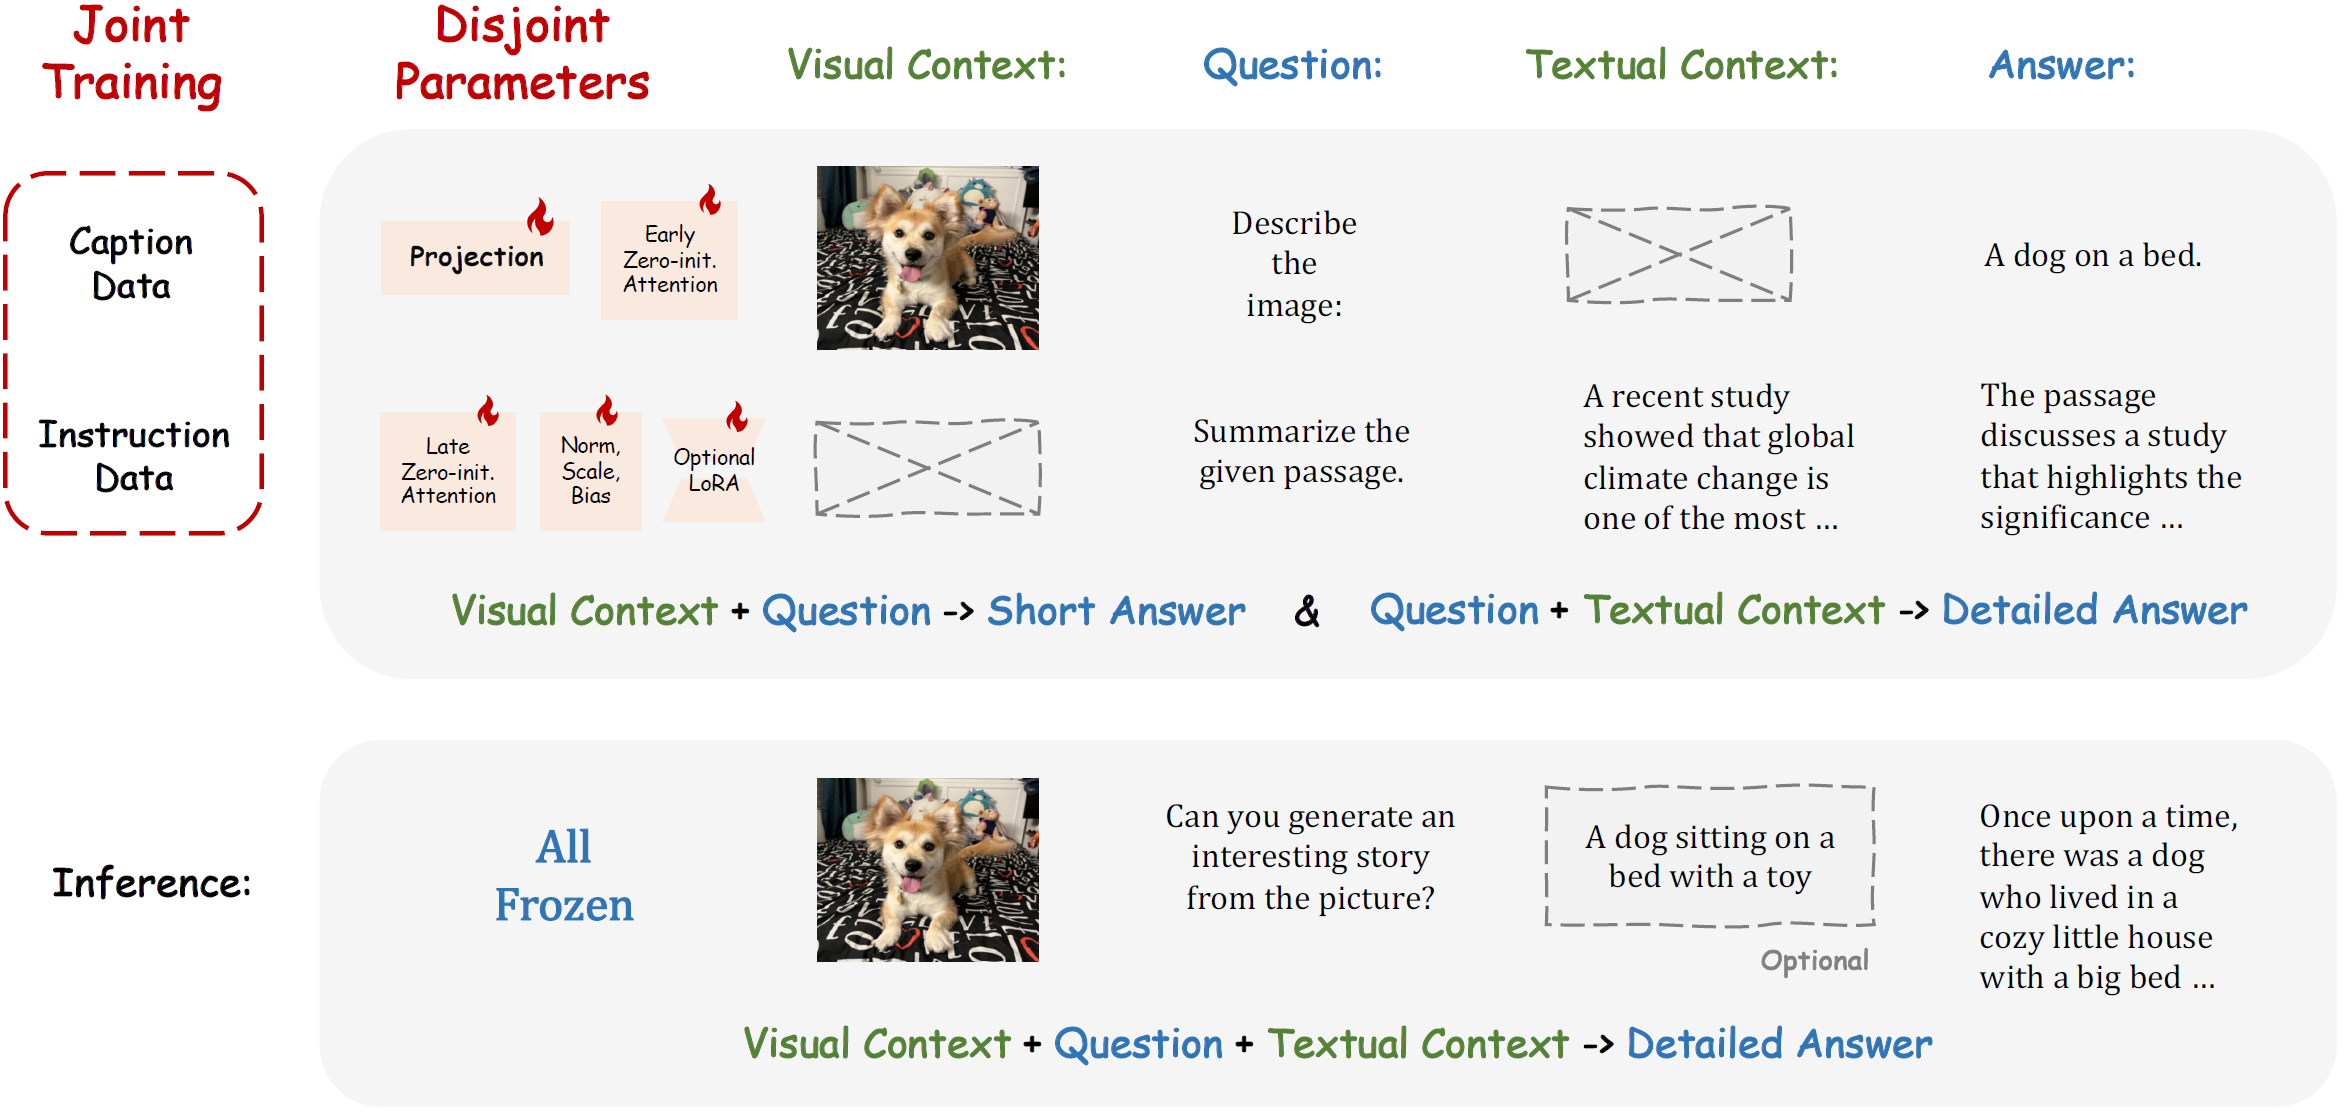
<!-- Figure 2. **Joint Training Paradigm in LLaMA-Adapter V2**. We utilize both image-text caption and language-only instruction data to jointly train LLaMA-Adapter V2, optimizing disjoint groups of learnable parameters. -->
图2. **LLaMA-Adapter V2 中的联合训练范式**。我们利用图像-文本标题和纯语言指令数据, 联合训练 LLaMA-Adapter V2, 优化不相交的可学习参数组。

<!-- **Discussion**. Aided by our joint training strategy, LLaMA-Adapter V2 requires no high-quality multi-modal instruction data like MiniGPT-4 [78] and LLaVA [38], but only image-text pairs and instruction-following data, as compared in Tab. 1. The captioning data extends LLMs for image understanding with short answers as shown in Fig. 2, while the language-only instruction data is utilized to preserve LLaMA's capacity to generate long detailed sentences. With such complementarity, LLaMA-Adapter V2 achieves superior multi-modal reasoning by solely small-scale image-text and instruction-following data, without the need of high-quality multi-modal instruction data. -->
**讨论**。在我们的联合训练策略的帮助下, LLaMA-Adapter V2 不需要像 MiniGPT-4 [78] 和 LLaVA [38] 这样的高质量多模态指令数据, 而只需要图像-文本对和指令遵循数据, 如[表1](#table.1)所示。
字幕数据扩展了 LLMs, 用于具有简短回答的图像理解, 如[图2](#fig.2)所示, 而纯语言指令数据用于保留 LLaMA 生成长详细句子的能力。
有了这种互补性, LLaMA-Adapter V2 仅通过小规模图像-文本和指令遵循数据, 实现卓越的多模态推理, 而无需高质量的多模态指令数据。

<!-- Table 1. **Training Comparison of Different Methods**. CC, VG and L400 represent Conceptual Caption [5, 57], Visual Genome [30] and LAION 400M [56], respectively. Note that we count all the data and tuning parameters needed to convert the pretrained vision model and LLM into a visual instruction model. $*$ denotes the filtered dataset. -->
表1. <span id='table.1'></span> **不同方法的训练比较**。 CC、VG 和 L400 分别代表Conceptual Caption [5, 57], Visual Genome [30] and LAION 400M [56]。请注意, 我们统计了所有数据, 以及将预训练视觉模型和 LLM 转化为视觉指令模型所需的调整参数。$^*$ 表示筛选后的数据集。
<table>
<thead>
  <tr>
    <th style="text-align: center" rowspan="2">Model</th>
    <th style="text-align: center" colspan="3">Language Instruction Data</th>
    <th style="text-align: center" colspan="2">Image-Text Data</th>
    <th style="text-align: center" colspan="2">Visual Instruction Data</th>
    <th style="text-align: center">Tuning Parameters</th>
  </tr>
  <tr>
    <th style="text-align: center">Source</th>
    <th style="text-align: center">Type</th>
    <th style="text-align: center">Size</th>
    <th style="text-align: center">Source</th>
    <th style="text-align: center">Size</th>
    <th style="text-align: center">Source</th>
    <th style="text-align: center">Size</th>
    <th style="text-align: center">Size</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: center">MiniGPT-4 [78]</td>
    <td style="text-align: center">ShareGPT [1]</td>
    <td style="text-align: center">Conversation</td>
    <td style="text-align: center">70K</td>
    <td style="text-align: center">CC-VG-SBU-L400$^*$</td>
    <td style="text-align: center">134M</td>
    <td style="text-align: center">CC+ChatGPT</td>
    <td style="text-align: center">5K</td>
    <td style="text-align: center">13B</td>
  </tr>
  <tr>
    <td style="text-align: center">LLaVA [38]</td>
    <td style="text-align: center">ShareGPT [1]</td>
    <td style="text-align: center">Conversation</td>
    <td style="text-align: center">70K</td>
    <td style="text-align: center">CC$^*$</td>
    <td style="text-align: center">595K</td>
    <td style="text-align: center">COCO+GPT4</td>
    <td style="text-align: center">158K</td>
    <td style="text-align: center">13B</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\mathbf{LLaMA-Adapter V2}$$</td>
    <td style="text-align: center">GPT-4-LLM [50]</td>
    <td style="text-align: center">Single-turn</td>
    <td style="text-align: center">$$\mathbf{52K}$$</td>
    <td style="text-align: center">COCO [6]</td>
    <td style="text-align: center">$$\mathbf{567K}$$</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">$$\mathbf{0}$$</td>
    <td style="text-align: center">$$\mathbf{14M}$$</td>
  </tr>
</tbody>
</table>

## Early Fusion of Visual Knowledge
<!-- To avoid interference between visual and language finetuning, we propose a simple early fusion strategy to prevent direct interactions between the input visual prompts and adaptation prompts. In LLaMA-Adapter, the input visual prompts are sequentially encoded by a frozen visual encoder with a learnable visual projection layer, and then added to the adaptation prompts at every inserted layer. In LLaMA-Adapter V2, we instead inject the encoded visual tokens and adaptation prompts to different Transformer layers without fusing them together, which is shown in Fig. 3. For the dataset-shared adaptation prompts, we follow LLaMA-Adapter by inserting them at the last L layers (e.g., L=30). For the input visual prompts, we directly concatenate them with the word tokens at the first Transformer layer with the zero-initialized attention, other than adding them to the adaptation prompts. Together with the proposed joint training, this simple early fusion strategy of visual tokens can effectively resolve the conflict between the two types of fine-tuning targets. This contributes to a parameter-efficient LLaMA-Adapter V2 with superior multi-modal reasoning capabilities. -->
为了避免视觉和语言微调之间的干扰, 我们提出了一种简单的早期融合策略, 以防止输入视觉提示和adaptation提示之间的直接交互。
在LLaMA-Adapter中, 输入视觉提示由(具有可学习视觉投影层的)冻结的视觉编码器按顺序编码，然后被添加到每个插入层的adaptation提示中。
在LLaMA-Adapter V2中, 我们将编码的视觉词元和adaptation提示注入到不同的Transformer层, 而不再将它们融合在一起, 如[图3](#fig.3)所示。
对于数据集共享的adaptation提示, 我们遵循LLaMA-Adapter, 将它们插入最后$L$层(例如, $L = 30$)。
对于输入视觉提示, 我们在(使用零初始化的注意力的)第一个 Transformer 层, 直接将它们与单词词元连接起来, 而不是将它们添加到adaptation提示中。
结合提出的联合训练, 这种简单的视觉词元早期融合策略可以有效解决两类微调目标之间的冲突。
这有助于具有卓越多模态推理能力的参数高效的 LLaMA-Adapter V2。

<span id='fig.3'></span>
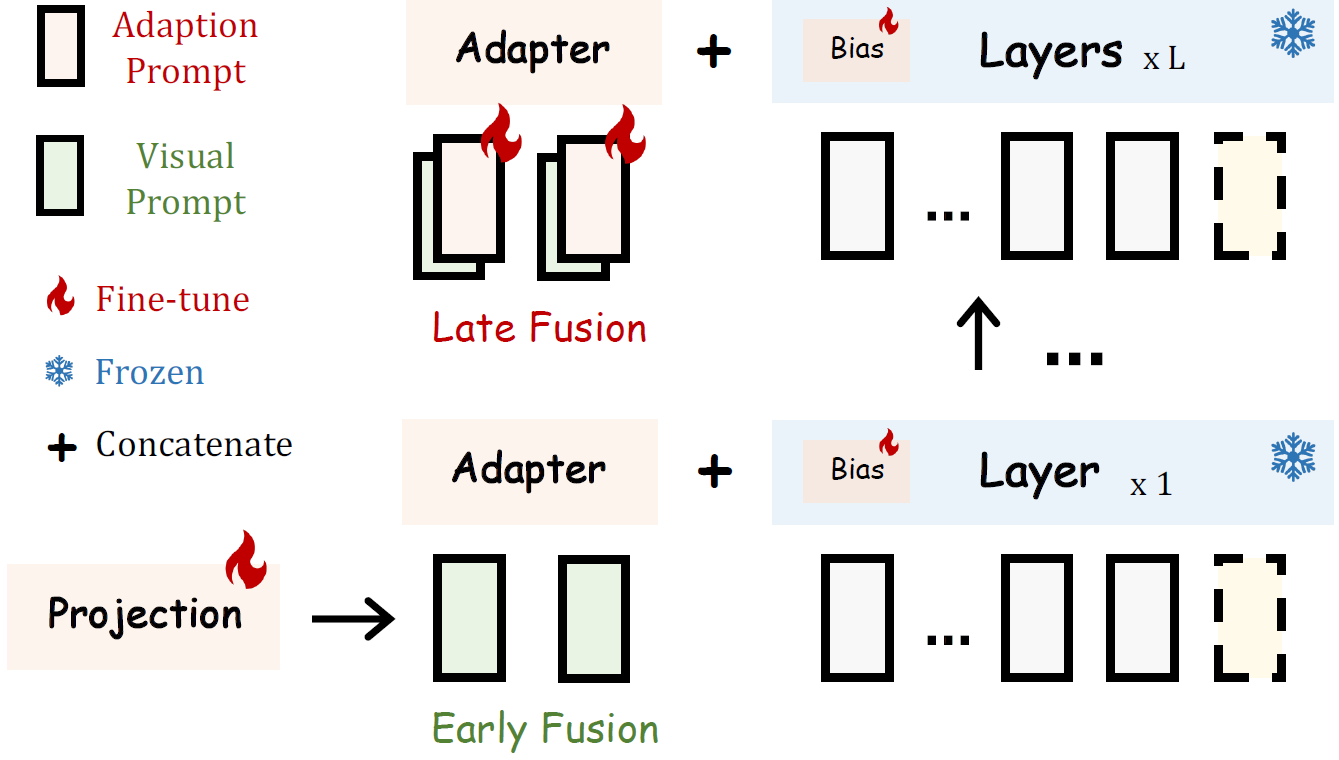
<!-- Figure 3. **Early Fusion of Visual Knowledge**. Following LLaMA-Adapter, we insert static adaptation prompts into the last L layers. For visual prompts, we insert them in the early stage of LLM, disjointing with adaptation prompts. -->
图3. **视觉知识的早期融合**。遵循LLaMA-Adapter, 我们将静态adaptation提示插入到最后$L$层。对于视觉提示, 我们将其插入到 LLM 的早期阶段, 与adaptation提示不相交。

## Integration with Experts
<!-- Recent visual instruction models such as MiniGPT-4 [78] and LLaVA [38] require massive-scale image-text training to connect visual models and LLMs. In contrast, our LLaMA-Adapter V2 fine-tunes on much smaller-scale common image captioning data [6], making it more dataefficient. However, the image understanding ability of our approach is relatively weak, leading to occasional inaccurate or unrelated responses. Rather than collecting more image-text data or adopting stronger multi-modal modules, we propose integrating expert systems, such as captioning, OCR, and search engines, to supplement LLaMA-Adapter V2 with additional visual reasoning proficiency. -->
最近的视觉指令模型, 如 MiniGPT-4 [78] 和 LLaVA [38], 需要大规模图像文本训练来连接视觉模型和 LLMs。
相比之下, 我们的 LLaMA-Adapter V2 在更小规模的常见图像字幕数据 [6] 上进行微调, 使其数据效率更高。
然而, 我们方法的图像理解能力相对较弱, 导致偶尔不准确或无关的响应。
我们建议集成专家系统(如字幕、OCR 和搜索引擎), 以为LLaMA-Adapter V2 补充额外的视觉推理能力, 而不是收集更多的图像文本数据或采用更强大的多模态模块。

<!-- As shown in Fig. 4, we utilize expert systems, such as captioning, detection, and OCR, to enhance the visual instruction-following capabilities of LLaMA-Adapter V2. Given an input image, we encode its visual context using a pre-trained visual encoder and ask an expert system to produce a caption as the textual context. In our default implementation, we adopt LLaMA-Adapter pre-trained on COCO Caption [6] as the expert system, since it can generate short and accurate image descriptions. However, it is worth noting that any image-to-text model or even a search engine can serve as the expert system here. Our approach allows us to easily switch among different expert systems based on the specific downstream task at hand. -->
如[图4](#fig.4)所示, 我们利用字幕、检测和 OCR 等专家系统, 增强 LLaMA-Adapter V2 的视觉指令遵循能力。
给定一个输入图像, 我们使用预训练的视觉编码器, 编码其视觉上下文, 并要求专家系统生成一个字幕作为文本上下文。
在我们的默认实现中, 我们采用在 COCO Caption [6] 上预训练的 LLaMA-Adapter 作为专家系统, 因为它可以生成简短而准确的图像描述。
然而, 值得注意的是, 任何图像到文本模型甚至搜索引擎都可以作为这里的专家系统。
我们的方法使我们能够基于手头的特定下游任务, 轻松地在不同的专家系统之间切换。

<span id='fig.4'></span>
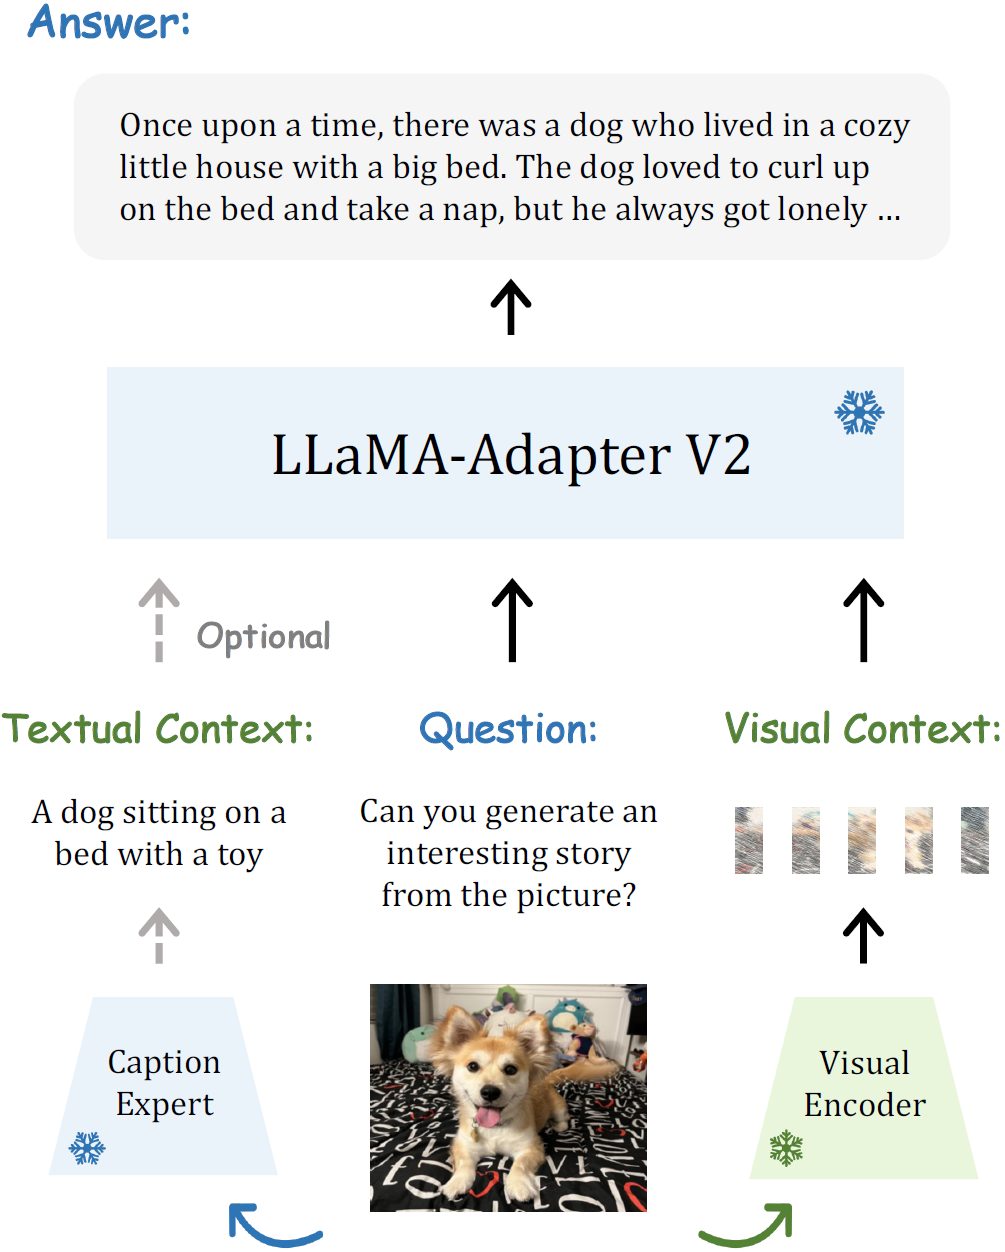
<!-- Figure 4. **Generation Pipeline of LLaMA-Adapter V2**. During inference, we introduce additional caption experts to generate a textual context for the input image, demonstrating strong visual understanding capacity of LLaMA-Adapter V2. -->
图4. **LLaMA-Adapter V2 的生成流水线**。在推理过程中, 我们引入额外的字幕专家, 为输入图像生成文本上下文, 展示了 LLaMA-Adapter V2 的强大视觉理解能力。

# Experiments
## Experimental Setups
<!-- **Training Data**. As shown in Tab. 1, we train LLaMA-Adapter V2 on 52K single-turn instruction data from GPT-4-LLM [50] and 567K captioning data from COCO Caption [6]. We do not use any visual instruction data like MiniGPT-4 [78] and LLaVA [38]. Besides, we also train a chatbot system using 80K conversation data collected by ShareGPT [1]. -->
**训练数据**。如[表1](#table.1)所示, 我们在 GPT-4-LLM [50] 的 52K single-turn指令数据和 COCO Caption [6] 的 567K 字幕数据上训练 LLaMA-Adapter V2。
我们不使用任何视觉指令数据, 如 MiniGPT-4 [78] 和 LLaVA [38]。
此外, 我们还使用(由 ShareGPT [1] 收集的)80K 会话数据, 训练聊天机器人系统。

<!-- **Implementation Details**. For the LLaMA-7B model with 32 Transformer layers, we insert static adaptation prompts into the last 31 layers. Additionally, we append dynamic visual prompts to the first layer, with a prompt length set to 20. All the parameters in normalization layers, linear layer bias and scale are set to be updated during training, while the remaining parameters in LLaMA are kept frozen. -->
**实施细节**。
对于具有 32 个 Transformer 层的 LLaMA-7B 模型, 我们将静态adaptation提示插入到最后 31 层中。
此外, 我们附加动态视觉提示到第一层, 提示长度设置为 20。
规范化层、线性层偏置和缩放中的所有参数在训练期间都设置为待更新, 而 LLaMA 中的其余参数保持冻结。

## Stronger Language Instruction Model
<!-- With the proposed bias tuning strategy and high-quality instruction data [50], LLaMA-Adapter V2 was able to further enhance the instruction-following capability of LLaMA. As shown in Tab. 2, LLaMA-Adapter V2 can provide comprehensive answers to human instructions as well as the detailed explanations of the answers, while LLaMA-Adapter only delivers relatively short answers. -->
通过提出的偏置调整策略和高质量的指令数据 [50], LLaMA-Adapter V2 能够进一步增强 LLaMA 的指令遵循能力。
如[表2](#table.2)所示, LLaMA-Adapter V2 可以提供对人类指令的全面回答, 以及回答的详细解释, 而 LLaMA-Adapter 只能提供相对较短的答案。

<!-- Given that bias tuning involves more learnable parameters for knowledge updating, it is possible to build a chatbot system that requires a deeper understanding of language context. By training LLaMA-Adapter V2 on 80K conversation data [1], we developed a stronger chatbot model. Fig. 11 presents a chatbot example using a 7 billion model where the system is able to answer our questions, but its understanding of context is not very accurate. By scaling the model to 65 billion (Fig. 10), the chatbot becomes more powerful and answers our questions very well. In Fig 5, we also use GPT4 to assess the response quality, where LLaMA-Adapter V2 even beats ChatGPT on the total scores and 50/80 questions. -->
鉴于偏置调整涉及更多可学习的参数用于知识更新, 可以构建一个需要对语言上下文深入理解的聊天机器人系统。
通过在 80K 对话数据 [1] 上训练 LLaMA-Adapter V2, 我们开发了一个更强大的聊天机器人模型。
[图11](#fig.11) 展示了一个使用 70 亿模型的聊天机器人示例, 其中系统能够回答我们的问题, 但它的上下文理解不是很准确。
通过将模型扩展到 650 亿([图10](#fig.10)), 聊天机器人变得更加强大, 可以很好地回答我们的问题。
在[图5](#fig.5)中, 我们还使用 GPT4 评估响应质量, 其中 LLaMA-Adapter V2 甚至在总分和 50/80 问题上击败 ChatGPT。

<span id='fig.5'></span>
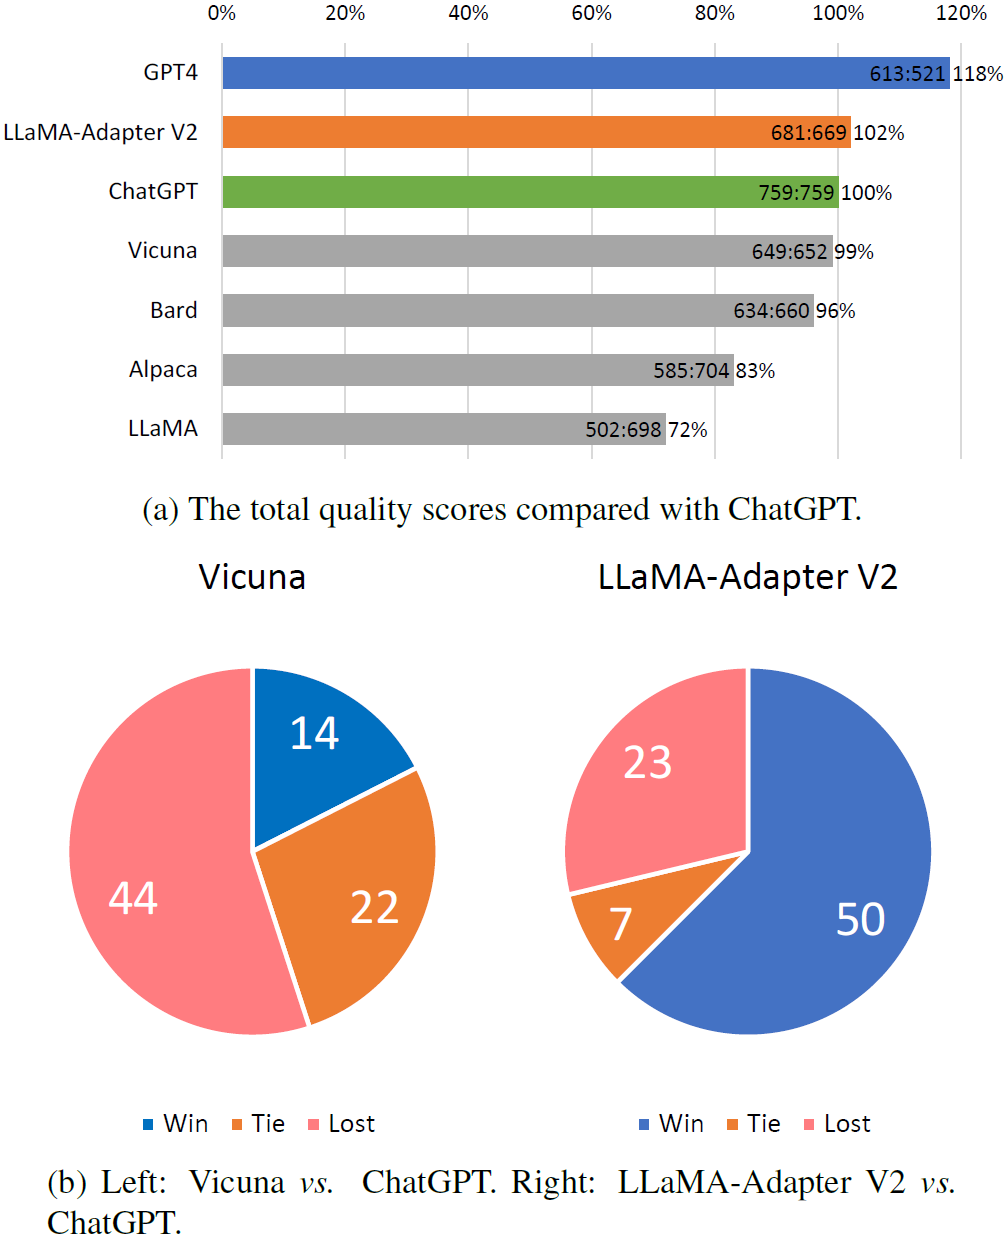
<!-- Figure 5. **Response Quality Comparisons** assessed by GPT4. The comparison baseline is ChatGPT. We use GPT4 to assess the response quality of different methods on 80 questions [7]. Note that our model is based on LLaMA-65B, while Vicuna is built on LLaMA-13B. But we only fine-tune 14M parameters, while Vicuna requires fine-tuning the whole 13B parameters. -->
图5. GPT4 评估的 **响应质量比较**。比较基线是 ChatGPT。我们使用 GPT4 对80个问题评估不同方法的响应质量 [7]。请注意, 我们的模型基于 LLaMA-65B,而 Vicuna 则基于 LLaMA-13B 构建。但我们只微调了 14M 参数, 而 Vicuna 需要微调全部 13B 参数。

## Visual Instruction Model
<!-- LLaMA-Adapter is primarily a language instruction model or a close-set vision-language model, while LLaMA-Adapter V2 is a powerful visual instruction model that is jointly trained on caption and language-only instruction data. In this section, we study LLaMA-Adapter V2's image captioning ability and demonstrate how it can be extended to general-purpose multi-modal understanding systems like GPT-4. In addition, we incorporate expert systems to further improve LLaMA-Adapter V2's visual instruction-following capability. -->
LLaMA-Adapter 主要是一个语言指令模型或一个close-set视觉语言模型, 而 LLaMA-Adapter V2 是一个强大的视觉指令模型, 它在字幕和纯语言指令数据上进行联合训练。
在本节中, 我们研究 LLaMA-Adapter V2 的图像字幕能力, 并展示如何将其扩展到 GPT-4 等通用多模态理解系统。
此外, 我们集成专家系统, 进一步提高 LLaMA-Adapter V2 的视觉指令遵循能力。

<!-- **Image Captioning**. As discussed in Sec. 3, LLaMA-Adapter supports multi-modal inputs by simply adding visual features to adaptation prompts. After fine-tuning on COCO Caption dataset, we transform LLaMA-Adapter into a strong image captioner. In Tab. 3, we can observe that LLaMA-Adapter achieves comparable results to BLIP [32, 33], even without pre-training on large-scale image-text data. However, LLaMA-Adapter cannot reuse the language modeling ability of the LLM since it is sensitive to specific prompts, such as "Generate caption for this image". -->
**图像字幕**。
如第 [3](#A-Revisit-of-LLaMA-Adapter) 节所述, LLaMA-Adapter 只需向adaptation提示添加视觉特征即可支持多模态输入。
<font color="red">在 COCO Caption 数据集上进行微调后, 我们将 LLaMA-Adapter 转化为一个强大的图像字幕生成器</font>。
在[表3](#table.3)中, 我们可以观察到 LLaMA-Adapter 实现了与 BLIP [32, 33] 相当的结果, 即使没有在大规模图像-文本数据上的预训练。
但是, LLaMA-Adapter 无法重用 LLM 的语言建模能力, 因为它对特定提示很敏感, 例如"为此图像生成字幕"。

<!-- Table 3. **Comparisons on COCO Caption**. BLIP and BLIP2 require pretraining (PT) on COCO Caption [6], Visual Genome [30], Conceptual Captions [5, 57] and LAION [56], while ClipCap and our approach only fine-tune (FT) the model on COCO Caption. -->
表3. **COCO Caption 上的对比**。BLIP 和 BLIP2 需要在 COCO Caption [6], Visual Genome [30], Conceptual Captions [5, 57] 和 LAION [56] 上预训练 (PT), 而 ClipCap 和我们的方法仅在 COCO Caption 上微调 (FT)模型。
<table>
<thead>
  <tr>
    <th style="text-align: center" rowspan="2">Model</th>
    <th style="text-align: center" colspan="2">Data Scale</th>
    <th style="text-align: center" colspan="2">COCO Caption</th>
  </tr>
  <tr>
    <th style="text-align: center">PT</th>
    <th style="text-align: center">FT</th>
    <th style="text-align: center">BLEU@4</th>
    <th style="text-align: center">CIDEr</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align: left">ClipCap [46]</td>
    <td style="text-align: right">0</td>
    <td style="text-align: center">0.6M</td>
    <td style="text-align: center">33.5</td>
    <td style="text-align: center">113.1</td>
  </tr>
  <tr>
    <td style="text-align: left">BLIP [33]</td>
    <td style="text-align: right">14M</td>
    <td style="text-align: center">0.6M</td>
    <td style="text-align: center">40.4</td>
    <td style="text-align: center">136.7</td>
  </tr>
  <tr>
    <td style="text-align: left">BLIP2 [32]</td>
    <td style="text-align: right">129M</td>
    <td style="text-align: center">0.6M</td>
    <td style="text-align: center">43.7</td>
    <td style="text-align: center">145.3</td>
  </tr>
  <tr>
    <td style="text-align: left">LLaMA-Adapter V2</td>
    <td style="text-align: right">0</td>
    <td style="text-align: center">0.6M</td>
    <td style="text-align: center">36.2</td>
    <td style="text-align: center">122.2</td>
  </tr>
</tbody>
</table>


<!-- By employing early fusion and joint training, LLaMA-Adapter V2 has become a powerful visual instruction model that can simultaneously perform language instruction-following and image captioning. We provide some examples in Fig. 6 to compare the image captioning results between LLaMA-Adapter and LLaMA-Adapter V2. For an given image, LLaMA-Adapter can only produce a short, close-form image description, while LLaMA-Adapter V2 is able to generate natural and detailed image descriptions. -->
通过使用早期融合和联合训练, LLaMA-Adapter V2 已成为一个强大的视觉指令模型, 可以同时执行语言指令遵循和图像字幕。
我们在[图6](#fig.6)中提供了一些示例, 比较 LLaMA-Adapter 和 LLaMA-Adapter V2 的图像字幕结果。
对于一个给定的图像, LLaMA-Adapter 只能生成简短、封闭形式的图像描述, 而 LLaMA-Adapter V2 能够生成自然、详细的图像描述。

<!-- In addition, we note that LLaMA-Adapter V2 may not always generate accurate image description. As seen in the failure case presented in Fig. 6, we intentionally chose an out-of-distribution example (cartoon picture) for testing. LLaMA-Adapter V2 was unable to comprehend the image and generated incorrect descriptions. The possible reason for this failure is the lack of an image-text alignment stage, which models like MiniGPT-4 and LLaVA have incorporated. This motivates us to employ additional expert systems to enhance the image understanding ability. -->
此外, 我们注意到 LLaMA-Adapter V2 可能并不总是生成准确的图像描述。
如[图6](#fig.6)中展示的失败案例, 我们故意选择一个分布外的示例(卡通图片), 用于测试。
LLaMA-Adapter V2 无法理解图像, 并生成了错误的描述。
导致此失败的可能原因是图像-文本对齐阶段的缺失, 而 MiniGPT-4 和 LLaVA 等模型已将对其阶段纳入。
这促使我们使用额外的专家系统, 增强图像理解能力。

<!-- **Visual Understanding**. Thanks to our proposed joint training and early fusion techniques, LLaMA-Adapter V2 exhibits exceptional multi-modal understanding capabilities. As shown in Fig. 7, when presented with a prompt about the image content, such as in the form of "why is ..." and "what should ...", our model is able to seamlessly integrate the visual information with the language context, allowing for more sophisticated reasoning and decision-making. From the examples, we can see that our model is able to identify and explain the specific object or feature in the image that the question is referring to, and provide relevant information or suggestions based on the context. Moreover, our model is able to extrapolate and provide a plausible guess or explanation even when the question goes beyond the direct information presented in the image. These results demonstrate the effectiveness of LLaMA-Adapter V2 in addressing the challenge of interference between image-text pairs and instruction data, and highlight the potential of LLaMA-Adapter V2 in various real-world applications that require both language and visual understanding. -->
**视觉理解**。
得益于我们提出的联合训练和早期融合技术, LLaMA-Adapter V2 展现出卓越的多模态理解能力。
如[图7](#fig.7)所示, 当出现有关图像内容的提示时, 例如"why is ..."和"what should ...", 我们的模型能够无缝集成视觉信息与语言上下文, 允许更复杂的推理和决策。
从示例中, 我们可以看到我们的模型能够识别并解释(问题所指的)图像中的特定对象或特征, 并根据上下文提供相关信息或建议。
此外, 即使问题超出图像中呈现的直接信息, 我们的模型也能够推断并提供合理的猜测或解释。
这些结果表明 LLaMA-Adapter V2 在解决图像文本对与指令数据之间的干扰方面的有效性, 并凸显了 LLaMA-Adapter V2 在(需要语言和视觉理解的)各种现实应用中的潜力。

<!-- **Integration with Experts**. To further enhance LLaMA-Adapter V2's visual understanding capabilities, we integrate visual expert models during inference to provide additional textual contexts based on the input image. The examples of using LLaMA-Adapter [72] as the caption expert are shown in Fig. 8. By including a short caption of the image, our LLaMA-Adapter V2 produces more precise and detailed responses about the visual contents in the image. Another example using the OCR expert from DocVQA [44] is presented in Fig. 9. By utilizing the detected texts in the image, our model receives more specific cues, such as the price of the glasses, and produces accurate answers to the question. The integration of experts thus largely extends the power of LLaMA-Adapter V2 and fully unleashes its multi-modal reasoning potential. -->
**与专家系统的集成**。
为了进一步增强 LLaMA-Adapter V2 的视觉理解能力, 我们在推理过程中集成视觉专家模型, 基于输入图像提供额外的文本上下文。
[图8](#fig.8)展示了使用 LLaMA-Adapter [72] 作为字幕专家的例子。
通过添加图像的简短标题，我们的 LLaMA-Adapter V2 可以对图像中的视觉内容产生更精确、更详细的响应。
[图9](#fig.9) 显示了使用 DocVQA [44] 的 OCR 专家的另一个示例。
通过利用图像中检测到的文本, 我们的模型接收更具体的线索, 例如眼镜的价格, 并对问题产生准确的回答。
因此, 专家系统的集成极大地扩展了 LLaMA-Adapter V2 的能力, 并充分发挥其多模态推理潜力。

# Conclusion
<!-- In this work, we propose LLaMA-Adapter V2, a parameter-efficient visual instruction tuning system. Through joint training on image-text pairs and instruction-following data, we observe that LLaMA-Adapter V2 can convert pre-trained LLMs into a zero-shot visual instruction model. With the assistance of simple bias-tuning strategy and early-fusion of visual features, LLaMA-Adapter V2's zero-shot visual instruction-following ability is further improved by alleviating the interference between image-text pairs and instruction-following data. At the same time, LLaMA-Adapter V2 achieves stronger language instruction-following performance and even possesses multi-turn dialog ability like a chatbot. To address the inaccurate image description problem of LLaMA-Adapter V2, we integrate expert visual systems, such as OCR and image captioner, to provide more accurate image-related information. While LLaMA-Adapter V2 can incorporate expert visual systems and perform visual instruction-following in a zero-shot manner, it still lags behind LLaVA in terms of visual understanding capability and is susceptible to inaccurate information provided by the expert systems. In the future, we plan to explore the integration of more expert systems, and fine-tune LLaMA-Adapter V2 with a multi-modal instruction dataset or other PEFT methods (e.g., LoRA) to further enhance its visual instruction-following capabilities. -->
在本文中, 我们提出了LLaMA-Adapter V2, 一种参数高效的视觉指令调整系统。
通过在图像-文本对和指令遵循数据上的联合训练, 我们观察到LLaMA-Adapter V2可以将预训练的LLMs转化为零样本视觉指令模型。
借助简单的偏置调整策略和视觉特征的早期融合, 通过缓解图像-文本对和指令遵循数据之间的干扰, LLaMA-Adapter V2的零样本视觉指令遵循能力得到进一步提升。
同时, LLaMA-Adapter V2实现了更强的语言指令遵循性能, 甚至拥有像聊天机器人一样的多轮对话能力。
为了解决LLaMA-Adapter V2的图像描述不准确问题, 我们集成了OCR和图像字幕等专家视觉系统, 以提供更准确的图像相关信息。
虽然LLaMA-Adapter V2可以集成专家视觉系统并以零样本方式执行视觉指令遵循, 但它在视觉理解能力方面仍落后于LLaVA, 并且容易受专家系统提供的不准确信息的影响。
未来，我们计划探索更多专家系统的集成, 并使用多模态指令数据集或其他PEFT方法(例如LoRA)对LLaMA-Adapter V2进行微调, 以进一步增强其视觉指令遵循能力。

<!-- Table 2. **Comparisons of Instruction-following Ability** between LLaMA-Adapter V2 and LLaMA-Adapter. -->
表2. <span id='table.2'></span> LLaMA-Adapter V2 与 LLaMA-Adapter 的指令遵循能力对比。
Instruction | LLaMA-Adapter V2 | LLaMA-Adapter
:- | :- | :-
How can I develop my critical thinking skills? Give me three suggestions. | 1. Read widely: Reading books, articles, and other sources of information can help you develop your critical thinking skills. By exposing yourself to different perspectives and ideas, you can learn to analyze and evaluate information more effectively.<br>2. Practice mindfulness: Mindfulness is the practice of being present in the moment and paying attention to your thoughts and feelings. By being more aware of your thoughts and emotions, you can better understand and evaluate them. This can help you develop a more objective and rational approach to thinking.<br>3. Engage in open-minded discussions: Join a discussion group or debate club where you can engage in open-minded discussions with others. This can help you develop your critical thinking skills by challenging your assumptions and encouraging you to consider different perspectives. | 1. Read widely and critically. <br>2. Engage in discussions with people who have different perspectives. <br>3. Ask questions and seek out answers.
As a superhero, how would you explain your origin story to a curious child? | As a superhero, I have a very interesting and exciting origin story to share with you. Once upon a time, there was a young boy named John who lived in a small town. John was always curious and wanted to help others, so he spent his days exploring the world around him and learning about different cultures and people. One day, while he was out exploring, he stumbled upon a mysterious cave. Inside the cave, John found a strange device that had the power to give him incredible abilities. With these abilities, John could fly, shoot lasers from his eyes, and even turn invisible.<br>John knew that he had to use these powers for good, so he decided to become a superhero and use his abilities to protect his town and the people who lived there. He started to train every day, learning how to use his powers and how to fight against evil. Eventually, John became the superhero known as "The Invisible Man" and he used his powers to help others and make the world a better place.<br>That's my origin story, and I'm sure you'll love it! | Once upon a time, there was a young boy who had a special power. He used his power to help people in need and protect the innocent. He became known as the superhero, and he used his powers to fight evil and protect the world.
Write a regex to remove all the HTML tags in a python string. | Here is a simple regex that can be used to remove all HTML tags from a string in Python:<br>`import re`<br>` `<br>`string = "This is a <strong>test</strong> string"`<br>` `<br>`# Remove all HTML tags from the string`<br>`result = re.sub(r’<.*?>’, ’’, string)`<br>` `<br>`# Print the result`<br>`print(result)`<br><br>This will output:<br>`This is a test string` | `re.sub(r’<[ˆ>]*>’, ’’, str)`

<span id='fig.6'></span>
image | text
:-: | :-
Success Case 1 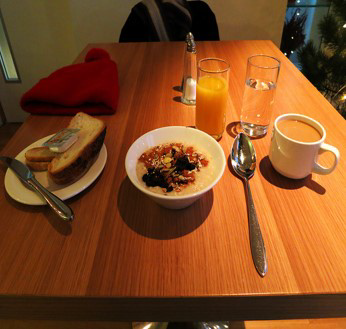 | <!-- **V1**: A bowl of cereal, a cup of coffee and a sandwich on a table.<br>**V2**: The image features a dining table set up with a variety of food items, including a bowl of fruit, a cup of coffee, and a plate of pastries. The table is set with a knife, fork, and a spoon, suggesting that the food is ready to be consumed. The dining table is situated in a kitchen, with a chair placed near the table. The chair is positioned next to a small table, which may be used for additional food items or drinks. The room is well-lit, with a lamp illuminating the area. -->**V1**：桌上有一碗麦片、一杯咖啡和一个三明治。<br>**V2**：图片展示了餐桌上摆放着各种食物, 包括一碗水果、一杯咖啡和一盘糕点。桌上摆放着刀、叉和勺子, 表示食物已准备好食用。餐桌位于厨房内, 桌子旁边放着一把椅子。椅子旁边是一张小桌子, 可能用于放置其他食物或饮料。房间光线充足, 一盏灯照亮了整个区域。
Success Case 2 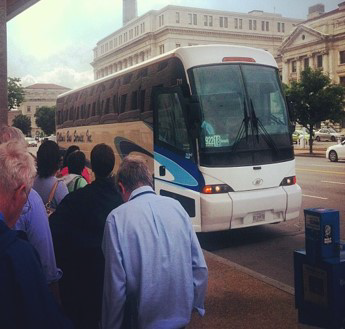 | <!-- **V1**: A group of people waiting to board a bus.<br>**V2**: In the image, a large bus is parked on the side of the road, with several people standing nearby. There are at least three people standing near the bus, with one person holding a backpack and another person holding a bag. A few more people can be seen in the background, walking towards the bus. The bus is painted white, and its front end is visible, with a few people standing near the front. A few cars are also visible in the background, adding to the busy street scene. -->**V1**：一群人等着上公交车。<br>**V2**：图片中, 一辆大巴停在路边, 旁边站着几个人。公交车旁边至少站着三个人, 其中一个人背着背包, 另一个人提着包。背景中还可以看到几个人朝公交车走去。公交车漆成白色, 车头清晰可见, 车头附近站着几个人。背景中还可以看到几辆汽车, 为繁忙的街道场景增添了色彩。
Failure Case 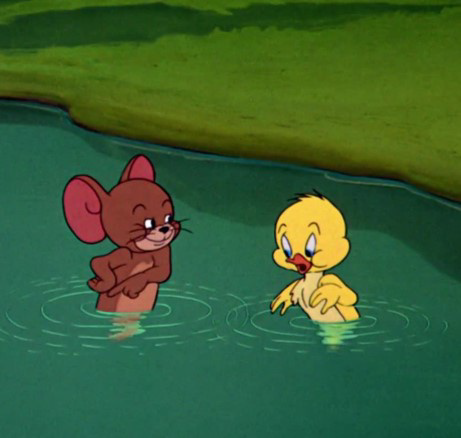 | <!-- **V1**: A mouse and a duck in a body of water.<br>**V2**: In the image, two men are standing on a dock near a lake or river. One man is wearing a blue shirt and the other is wearing a white shirt. Both men are looking down and appear to be fishing. They are standing near a small rocky area and are in the water up to their knees. In the image, there is also a dog, a yellow labrador retriever, swimming in the water near the men. The dog appears to be swimming towards the men, perhaps attracted by the presence of the fishermen. The dog is wearing a red collar and appears to be enjoying its time in the water with the two men. -->**V1**：水中一只老鼠和一只鸭子。<br>**V2**：图片中, 两名男子站在湖泊或河流附近的码头上。一名男子穿着蓝色衬衫, 另一名男子穿着白色衬衫。两名男子都向下看, 似乎在钓鱼。他们站在一小块岩石附近, 水深及膝盖。图片中, 还有一只狗, 一只黄色的拉布拉多猎犬, 在男子附近的水中游泳。这只狗似乎正向男子游去, 也许被渔民的出现所吸引。这只狗戴着红色项圈, 似乎很享受与两名男子在水中的时光。

<!-- Figure 6. **Comparisons of Image Captioning Results** between LLaMA-Adapter and LLaMA-Adapter V2. -->
图 6. LLaMA-Adapter 和 LLaMA-Adapter V2 的**图像字幕结果对比**。

<span id='fig.7'></span>
image | text
:-: | :-
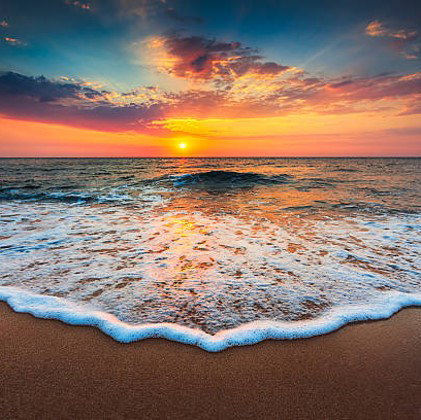 | **Instruction**: Explain why this image is beautiful.<br>**Answer**: This image is beautiful because it captures the serene and peaceful atmosphere of the beach, with the sun setting in the background. The image features a beautiful, golden sunset over the ocean, creating a stunning backdrop for the solitary figure walking along the sandy beach. The combination of the warm, golden light of the sunset, the blue water of the ocean, and the white sandy beach creates a breathtaking and calming scene. The image also highlights the vastness of the ocean, with the waves crashing against the shore, creating a soothing sound that adds to the tranquility of the setting. The image conveys a sense of relaxation and tranquility, making it a perfect representation of a beautiful beach scene.
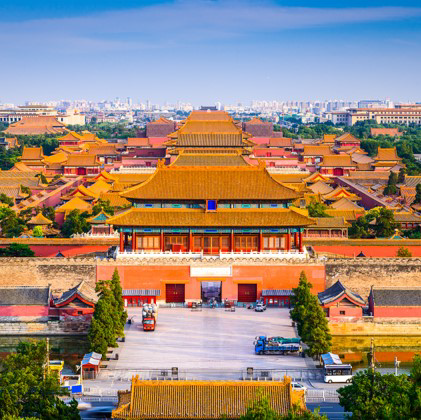 | **Instruction**: What city might this picture be taken from? Can you give me some suggestions if I want to visit this city?<br>**Answer**: The image might be taken from Beijing, China. Beijing is the capital city of China and one of the most populous cities in the world. It is known for its rich history and culture, as well as its modern infrastructure and architectural landmarks. Some popular attractions in Beijing include the Forbidden City, Temple of Heaven, and the Great Wall of China, among others. If you want to visit Beijing, it is recommended to explore its historical and cultural heritage, as well as its modern developments.
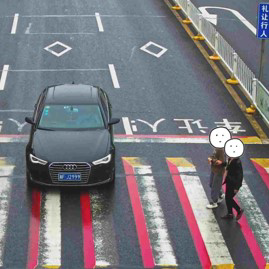 | **Instruction**: What should the car do here?<br>**Answer**: The car should follow the pedestrian crossing the street, as indicated by the red light. The car should stop at the red light and wait for the pedestrian to cross the street safely before proceeding. This is a common practice to ensure the safety of pedestrians and drivers alike.

Figure 7. **The Visual Understanding Examples** of LLaMA-Adapter V2.

<span id='fig.8'></span>
image | text
:-: | :-
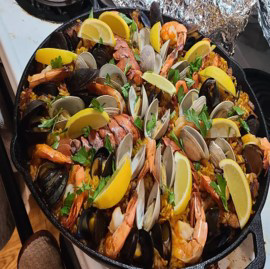 | **Instruction**: Could you list the steps for cooking the dish shown in the image?<br>**w/o Context**: Yes, the steps for cooking the dish shown in the image can be summarized as follows: 1. Boil the octopus in salted water to tenderize the meat. 2. Remove the octopus from the boiling water and drain the excess liquid. 3. Allow the octopus to cool down to room temperature. 4. Cut the octopus into small pieces, preferably 1-2 inches in size. 5. In a large skillet, heat the olive oil and cook the octopus pieces until they turn golden brown. 6. Add the garlic and lemon juice to the skillet and continue to cook the octopus for a few more minutes. 7. Season the octopus with salt and pepper, to taste. 8. Serve the cooked octopus on a plate with the lemon wedges and garnish with the chopped parsley.<br>**w/ Context**: [Caption expert: A seafood dish with shrimp, octopus, and lobster.] The steps for cooking the seafood dish with shrimp, octopus, and lobster are as follows: 1. Start by preparing the seafood. 2. Heat up the oil in a pan or skillet. 3. Add the shrimp, octopus, and lobster to the pan. 4. Cook the seafood over medium heat for 10 minutes. 5. Season the dish with salt and pepper to taste. 6. Serve the dish with a side of rice, vegetables, or other starch. 7. Enjoy!
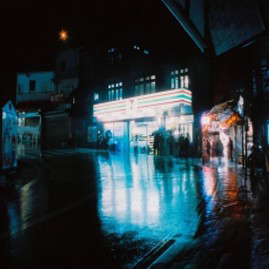 | **Instruction**: How to shoot such a picture using a film camera at night? Do you have some suggestions?<br>**w/o Context**: To capture the image of the neon sign in the rain, a film camera would need to be set up with a long exposure time to allow the light from the sign to be captured. This would require the photographer to use a tripod to keep the camera steady and to manually adjust the shutter speed to the desired exposure time. The photographer would also need to use a slow shutter speed to capture the light from the sign, which could range from 1 second to several minutes, depending on the desired effect. Additionally, the photographer would need to use a wide aperture setting to ensure that the entire sign is in focus, as well as a low ISO setting to minimize noise and preserve the image quality.<br>**w/ Context**: [Caption expert: A wet street with a building and a car.] To capture a nighttime scene with a wet street, a film camera, and a car, the photographer would need to use a slow shutter speed to allow more light to enter the camera's sensor. This would result in a blurred image of the moving car, but the building and the street would be sharply focused. The photographer could also use a tripod to steady the camera and reduce the shake caused by handheld shooting. Additionally, the photographer could use a flash to illuminate the car and the street, creating a more dramatic effect.

Figure 8. **Visual Understanding with the help of Caption Experts**. The caption expert is LLaMA-Adapter V1 trained on COCO Caption [6].

<span id='fig.9'></span>
image | text
:-: | :-
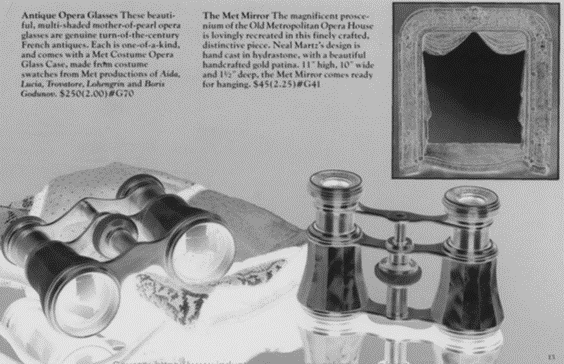 | **Question**: What is the cost of the Antique Opera glasses? Do you think it's worth buying the Antique Opera glasses and can you explain the reason in detail?<br>**OCR Context**: 1. Antique Opera Glasses These beauti- 2. ful, multi-shaded mother-of-pearl opera 3. The Met Mirror The magnificent prosce- 4. glasses are genuine turn-of-the-century 5. nium of the Old Metropolitan Opera House 6. French antiques. Each is one-of-a-kind, 7. is lovingly recreated in this finely crafted, 8. and comes with a Met Costume Opera 9. distinctive piece. Neal Martz's design is 10. hand cast in hydrastone, with a beautiful 11. Glass Case, made from costume 12. swatches from Met productions of Aida, 13. handcrafted gold patina. 11 high, 10 wide 14. Lucia, Trovatore, Lohengrin and Boris 15. and 11/2 deep, the Met Mirror comes ready 16. Godunov. \\$250(2.00) #G70 17. for hanging. \\$45(2.25) #G41 18. 13<br>**Language Instruction Model**: I'm sorry, but I am an AI language model and I don't have the ability to access images or prices. Could you please provide me with the price of the Antique Opera glasses so that I can provide you with an accurate response?<br>**Visual Instruction Model w/o Context**: The cost of the Antique Opera glasses is not mentioned in the image. However, the image suggests that the glasses are being sold in a store, which means that the cost may vary depending on the location, the vendor, and the specific glasses being sold. It is important to note that the value of the Antique Opera glasses is subjective and may depend on the individual's taste, preference, and budget. Some people may find the antique design and the history behind the glasses appealing and may be willing to pay a higher price for them.<br>**Visual Instruction Model w/ Context**: The cost of the Antique Opera glasses is \\$250 (2.00) and it is worth buying because they are genuine turn-of-the-century French antiques that are lovingly recreated in this finely crafted, hand cast in hydrastone, with a beautiful gold patina. The Met Mirror comes ready for hanging and is \\$45 (2.25).

Figure 9. **Visual Understanding with the help of OCR Experts**. The example and OCR context are from DocVQA [44].

- [ ] https://github.com/LlamaFamily/Llama-Chinese
    - [ ] https://llama.family/chat/#/
- [ ] https://github.com/hiyouga/LLaMA-Factory
- [ ] [Llama3 in torchtune](https://pytorch.org/torchtune/stable/tutorials/llama3.html)
- [ ] https://github.com/QwenLM/Qwen1.5

- [ ] [一文读懂Llama 2（从原理到实战）](https://zhuanlan.zhihu.com/p/653303123)
- [ ] [从0开始微调LLama2系列 (2) : 运行一下llama2](https://zhuanlan.zhihu.com/p/651637407)
- [ ] [Llama2+LoRA指令微调实战记录](https://zhuanlan.zhihu.com/p/659154202)
- [ ] [不到 200 行代码就能微调 Llama-2！](https://zhuanlan.zhihu.com/p/645564540)
- [ ] [开源大模型微调和训练-指令遵循语言模型 Alpaca](https://zhuanlan.zhihu.com/p/618423685)
- [ ] [LoRA（Low-Rank Adaptation of Large Language Models）-- 一种大模型prompt-tuning调优方法](https://www.cnblogs.com/LittleHann/p/17318509.html)
- [ ] [llama3微调具体案例](https://blog.csdn.net/weixin_39648954/article/details/138276504)

- LLaMA-Adapter V2
    - papers: [LLaMA](https://arxiv.org/abs/2302.13971), [Llama 2](https://arxiv.org/abs/2307.09288), [Code Llama](https://arxiv.org/abs/2308.12950)
    - https://zhuanlan.zhihu.com/p/626278423
    - https://github.com/OpenGVLab/LLaMA-Adapter/tree/main/llama_adapter_v2_multimodal7b
    - [LLaMA 2: A Detailed Guide to Fine-Tuning the Large Language Model](https://medium.com/@gobishangar11/llama-2-a-detailed-guide-to-fine-tuning-the-large-language-model-8968f77bcd15)
    - pretrained weights
        - [X] https://huggingface.co/nyanko7/LLaMA-7B/tree/main
        - [ ] https://github.com/juncongmoo/pyllama
            - https://zhuanlan.zhihu.com/p/622927692
            - pip install pyllama -U
            - python -m llama.download
        - [ ] https://huggingface.co/huggyllama/llama-7b/tree/main
        - [ ] https://github.com/meta-llama/llama/issues/149
        - [ ] https://ipfs.io/ipfs/Qmb9y5GCkTG7ZzbBWMu2BXwMkzyCKcUjtEKPpgdZ7GEFKm/
    - pre-trained model
        - [X] https://github.com/OpenGVLab/LLaMA-Adapter/releases/tag/v.2.0.0

- LLaMA-3
    - [github](https://github.com/meta-llama/llama3)
    - pretrained weights
        - [X] https://huggingface.co/bofenghuang/Meta-Llama-3-8B/tree/259f695a49bdcfeee8176180429e35fa1a0c4699/original
        - [ ] https://huggingface.co/bofenghuang/Meta-Llama-3-8B/tree/main
    

- LoRA
    - [paper](https://arxiv.org/abs/2106.09685)
    - [github](https://github.com/microsoft/LoRA)

- Video-LLaMA [paper](https://arxiv.org/abs/2306.02858) [github](https://github.com/DAMO-NLP-SG/Video-LLaMA)

todo:
- [ ] https://hub.binder.curvenote.dev/user/jupyter-xeus-xeus-cling-s6hewclg/notebooks/notebooks/xcpp.ipynb
- [ ] [多模态大模型 CLIP, BLIP, BLIP2, LLaVA, miniGPT4, InstructBLIP 系列解读](https://zhuanlan.zhihu.com/p/653902791)